# basic tips 

agg function : 
    - sum: Sum of values. <br>
    - mean: Mean of values.<br>
    - median: Median of values.<br>
    - min: Minimum value.<br>
    - max: Maximum value.<br>
    - count: Count of non-null values.<br>
    - std: Standard deviation of values.<br>
    - var: Variance of values.<br>
    - first: First value.<br>
    - last: Last value.<br>
    - prod: Product of values.<br>
    - size: Size of the group.<br>
    - nunique: Number of unique values.<br>
    - mode: Mode of values.<br>

## Open a file 

In [ ]:
article_df = pd.read_csv("./data/article_df_task-A.tsv.gz",sep="\t")

## data frame manipluation 

In [ ]:
# keep only some lines
top_5_topics = topic["topic"].tolist()
article_df = article_df[article_df["topic"].isin(top_5_topics)]

Visualisation : box plot 

## Test

| **Condition**                          | **Test**                |
|----------------------------------------|-------------------------|
| Data are normal, variances equal       | Independent t-test      |
| Data are normal, variances unequal     | Welch’s t-test          |
| Data are not normal                    | Mann-Whitney U test     |
| Non-parametric CI                      | Bootstrapping           |


In [ ]:
#Welch's test 
t_stat, p_val = ttest_ind(df_finished.eigenvector_target, df_not_finished.eigenvector_target, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


In [ ]:
#T test
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(df_finished.eigenvector_target, df_not_finished.eigenvector_target, equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


In [ ]:
from scipy.stats import mannwhitneyu
#Mann whitneyu --> not normal values 
u_stat, p_val = mannwhitneyu(df_finished.eigenvector_target, df_not_finished.eigenvector_target, alternative='two-sided')
print(f"U-statistic: {u_stat}, P-value: {p_val}")


In [ ]:
# non parametric CI 
import numpy as np

def bootstrap_mean_difference(data1, data2, n_resamples=10000):
    combined_diff = []
    for _ in range(n_resamples):
        resample1 = np.random.choice(data1, size=len(data1), replace=True)
        resample2 = np.random.choice(data2, size=len(data2), replace=True)
        combined_diff.append(np.mean(resample1) - np.mean(resample2))
    return np.percentile(combined_diff, [2.5, 97.5])  # 95% CI

ci = bootstrap_mean_difference(df_finished.eigenvector_target.values, df_not_finished.eigenvector_target.values)
print(f"95% Confidence Interval for Difference in Means: {ci}")


In [ ]:
subgraph_phobe.groupby("season")["centrality"].sem()#sem standar error 

convert types : 

set(...): Converts the list of tuples into a set, which ensures that each tuple appears only once (removing duplicates).

matching : 
zip() pairs the elements of these two iterables together

In [ ]:
vs = set(list(zip(paths.source.values, paths.shortest_path_length.values)))
# zip matches values --> object 
# lits(#type object )--> a list of tupples 
# set(#type tupple )--> set / removes duplicates 
print(type(vs))  # Output: <class 'set'>


In [ ]:
.values_count(normalized = True )#proportion 

Type: set.
Elements: Each element is a tuple (source, shortest_path_length).<br>
No Duplicates: The set ensures that no duplicate (source, shortest_path_length) pairs 
exist.<br>

# MAP : ajouter une colonne 

Creates a new column, speaker_2, in exam1 that contains the speaker corresponding to the id values mapped via the reply-to column.

The output depends on the availability of matching keys in the mapping index; missing keys will result in NaN.

In [ ]:
exam1["speaker_2"] = exam1['id'].map(exam1.set_index('reply-to')['speaker'].to_dict())
exam1["id_2"]=exam1['id'].map(exam1.set_index('reply-to')['id'].to_dict())
exam1.head()

# using merge 
df = exam1.merge(exam1[["id", "speaker"]], right_on="id", left_on="reply-to", how="left")


In [ ]:
import pandas as pd

data = {'id': [1, 2, 3], 'reply-to': [2, 3, 1], 'speaker': ['Alice', 'Bob', 'Charlie']}
exam1 = pd.DataFrame(data)
exam1["speaker_2"] = exam1['id'].map(exam1.set_index('reply-to')['speaker'])
print(exam1)


# Supervised learning 

In [194]:
# packages : 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
import seaborn as sns
import statsmodels.api as sm
import random
import sklearn
%matplotlib inline

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [195]:
# load data 
#data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Advertising.csv'

In [196]:
# Create a dictionary with the data
data_dict = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
    'radio': [37.8, 39.3, 45.9, 41.3, 10.8],
    'newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
    'sales': [22.1, 10.4, 9.3, 18.5, 12.9]
} # features : TV/radio/newspaper/sales 
#response : sales 

# Create a DataFrame from the dictionary
data= pd.DataFrame(data_dict)


## basic visualization

<Axes: xlabel='newspaper', ylabel='sales'>

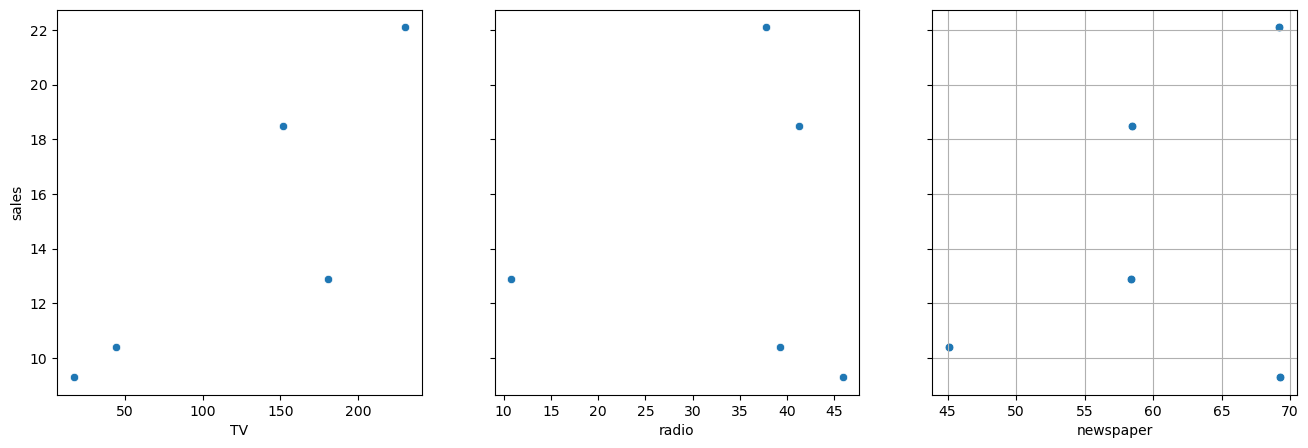

In [197]:
import seaborn as sns

# basic visualization using seaborn

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 5))
sns.scatterplot(data=data, x='TV', y='sales', ax=axs[0])
sns.scatterplot(data=data, x='radio', y='sales', ax=axs[1])
sns.scatterplot(data=data, x='newspaper', y='sales', ax=axs[2])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

Text(0.05, 0.95, 'Slope: -0.00')

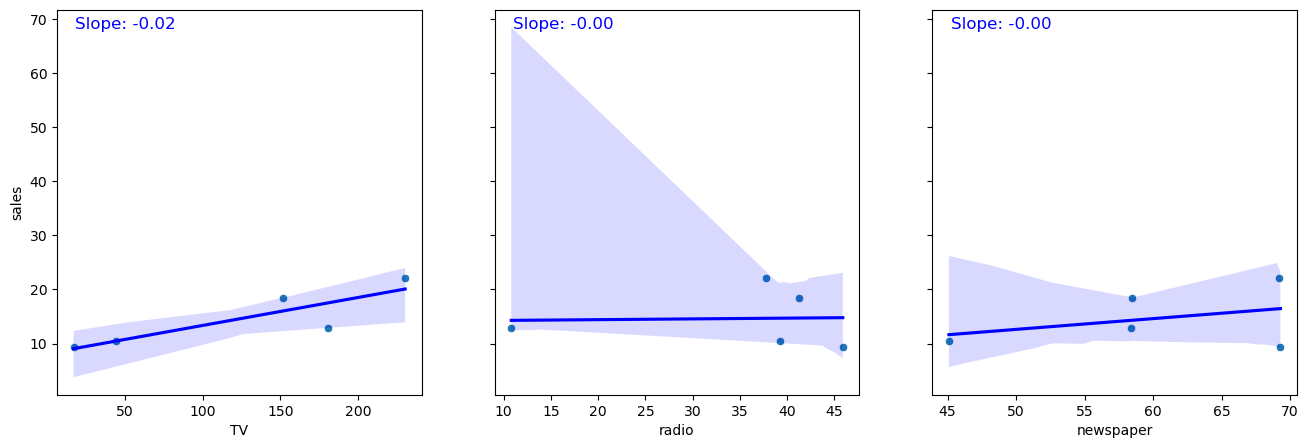

In [198]:
import seaborn as sns

# basic visualization using seaborn
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 5))
sns.scatterplot(data=data, x='TV', y='sales', ax=axs[0])
sns.scatterplot(data=data, x='radio', y='sales', ax=axs[1])
sns.scatterplot(data=data, x='newspaper', y='sales', ax=axs[2])

# Add linear regression lines
sns.regplot(data=data, x='TV', y='sales', ax=axs[0], scatter=False, color='blue')
sns.regplot(data=data, x='radio', y='sales', ax=axs[1], scatter=False, color='blue')
sns.regplot(data=data, x='newspaper', y='sales', ax=axs[2], scatter=False, color='blue')

# Add slope coefficients
tv_slope = lin_reg.coef_[0]
radio_slope = lin_reg.coef_[1]
newspaper_slope = lin_reg.coef_[2]

axs[0].annotate(f'Slope: {tv_slope:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')
axs[1].annotate(f'Slope: {radio_slope:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')
axs[2].annotate(f'Slope: {newspaper_slope:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')

## learning coefficient : simple linear regression  : sklearn.linear_model : scikit-learn

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

In [199]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,5.00000,5.000000,5.000000
mean,124.82000,35.020000,60.100000
std,90.77834,13.878653,9.973715
min,17.20000,10.800000,45.100000
25%,44.50000,37.800000,58.400000
50%,151.50000,39.300000,58.500000
75%,180.80000,41.300000,69.200000
max,230.10000,45.900000,69.300000


In [200]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

Text(0.05, 0.95, 'Slope: -0.04')

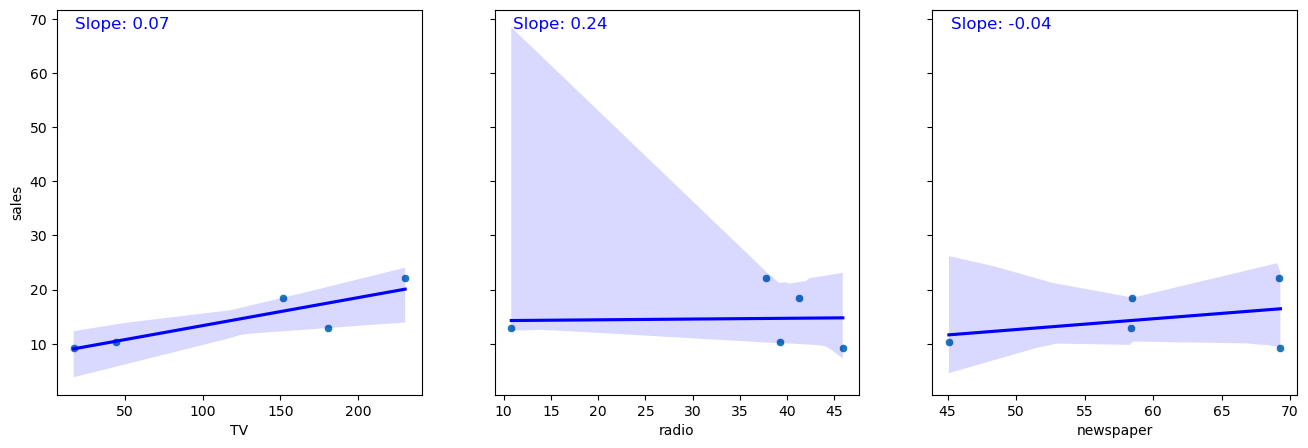

In [201]:
# add slope coefficient
# basic visualization using seaborn
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 5))
sns.scatterplot(data=data, x='TV', y='sales', ax=axs[0])
sns.scatterplot(data=data, x='radio', y='sales', ax=axs[1])
sns.scatterplot(data=data, x='newspaper', y='sales', ax=axs[2])

# Add linear regression lines
sns.regplot(data=data, x='TV', y='sales', ax=axs[0], scatter=False, color='blue')
sns.regplot(data=data, x='radio', y='sales', ax=axs[1], scatter=False, color='blue')
sns.regplot(data=data, x='newspaper', y='sales', ax=axs[2], scatter=False, color='blue')

# Add slope coefficients
tv_slope = lin_reg.coef_[0]
radio_slope = lin_reg.coef_[1]
newspaper_slope = lin_reg.coef_[2]

axs[0].annotate(f'Slope: {tv_slope:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')
axs[1].annotate(f'Slope: {radio_slope:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')
axs[2].annotate(f'Slope: {newspaper_slope:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')

In [202]:
#get the formula of the line 
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.07054431062196029 * TV + 
0.23961664570213537 * radio + 
-0.04017846280668967 * newspaper + 
-0.14199016963981315


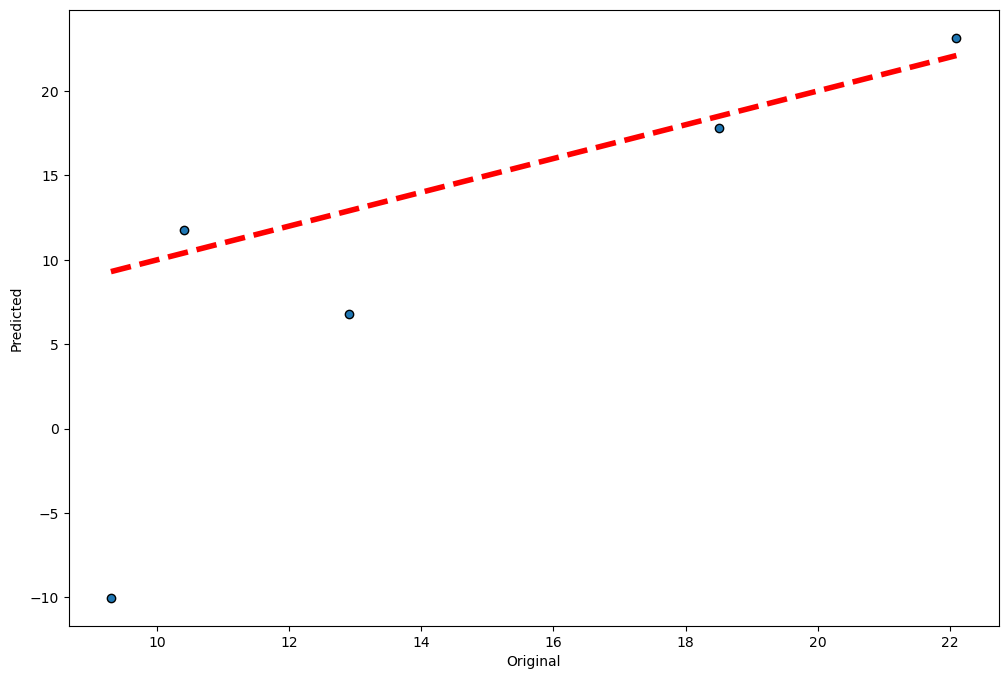

In [203]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [204]:
# mean square error 
mean_squared_error(y, predicted)
# as small as possible 
#  find b_1 such that sum ((y_i-X_i b_1)^2)

82.7741926240416

## Linear regression : stat model : smf.ols
- Regression analysis to model the number of days spent at the hospital, among the population of patients.

- To get started with our model, we need two components:

   1. The equation describing the model
   2. The data
   
- Equations are specified using patsy formula syntax. Important operators are:
    1. `~` : Separates the left-hand side and right-hand side of a formula.
    2. `+` : Creates a union of terms that are included in the model.
    3. `:` : Interaction term.
    3. `*` : `a * b` is short-hand for `a + b + a:b`, and is useful for the common case of wanting to include all interactions between a set of variables.
    
- Intercepts are added by default.
- Categorical variables can be included directly by adding a term C(a).


In [ ]:
# packages 
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### orinal encoder

In [ ]:
from feature_engine.encoding import OrdinalEncoder
encoder = OrdinalEncoder(
         encoding_method='arbitrary',
         variables=['topic'])#, 'embarked', 'sex'])
encoder.fit(article_df)
article_df = encoder.transform(article_df)
encoder.encoder_dict_ # get the def created 



In [ ]:
factor = pd.factorize(top5_articles_content['topic'])
top5_articles_content['labels'] = factor[0]
top5_definitions = factor[1]
print(top5_definitions)
top5_articles_content.head()

X = top5_articles_content['content'].to_numpy()
y = top5_articles_content['labels'].to_numpy()

In [ ]:
# 1 Declares the model
mod = smf.ols(formula='time ~ C(diabetes) + C(high_blood_pressure)', data=df)

# 2 Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

# 3 Print thes summary output provided by the library.
print(res.summary())

# 4 find mean value when having some specific features : (average time when diabete + high blood pressure )
print(df.loc[(df['diabetes'] == 0) & (df["high_blood_pressure"] == 0)]['time'].mean())



- The dependent variable : time (number of days at the hospital)
- Method: The type of model that was fitted (OLS)
- Nb observations: The number of datapoints (299 patients)
- R2: The fraction of explained variance
- A list of predictors
- For each predictor: coefficient, standard error of the coefficients, p-value, 95% confidence intervals. We can see significant predictor (p < 0.05).
- Warnings if there are numerical issues (hopefully not!)

In [ ]:
# with interaction terms 
# we use a*b to add terms: a, b, a:b, and intercept
# result of coef when high pressure and death 

mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
              data=df) # ols --> linear 

res = mod.fit()
print(res.summary())

#acces to mean value knowing some features 
print(df.loc[(df["high_blood_pressure"] == 1) & (df["DEATH_EVENT"] == 1), 'time'].mean())
print(df.loc[(df["high_blood_pressure"] == 1) , 'time'].mean())

# if increases  R2 : more variance in the data is explained.


### Regularization : 
Methods to reduce overfitting.
Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. <br>
This reduces the complexity of the model.

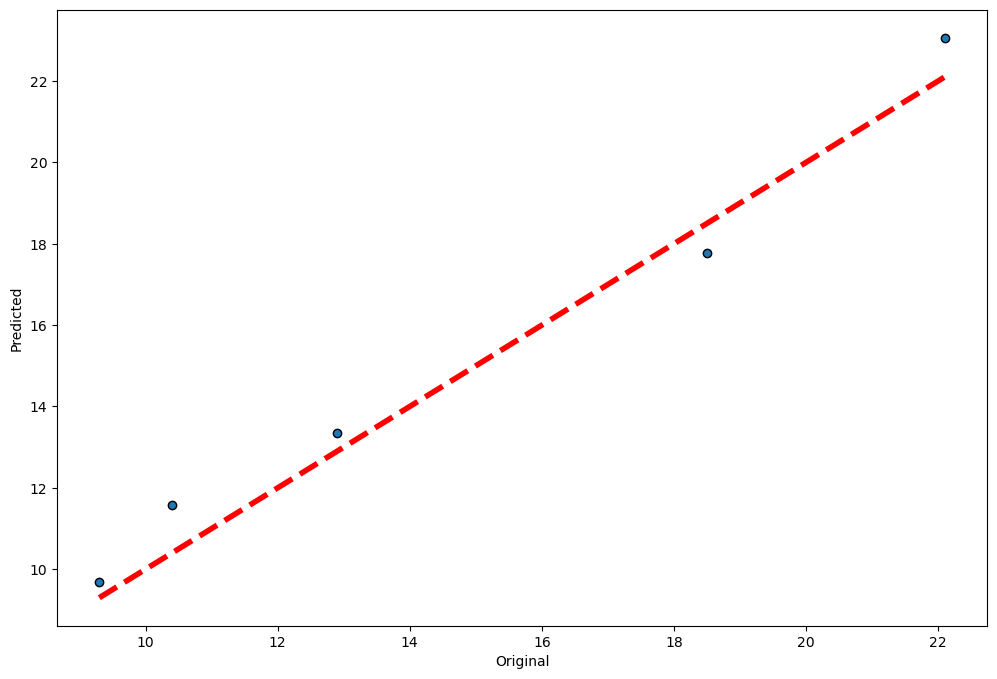

In [205]:
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [206]:
mean_squared_error(y, predicted_r)
#normally smaller 

0.644246258057233

## Logistic regression: Modelling the binary death outcome : smf.logit

- Finally, let's model the binary outcome of death, based on all patients' features.
- Exclude feature that are strongly correlated with response feature.

In [ ]:
# 1 standarize continuous : 

df['age'] = (df['age'] - df['age'].mean())/df['age'].std()

# 2 set the model : regression 
mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

# 3 acces res object 
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues
print(res.pvalues)
# standard errors
standard_errors = res.bse.values
print(res.bse.values)
#confidence intervals
res.conf_int()

### Effect of the predictors 

In [ ]:
# 4 Visualize the effect of all the predictors. Let's first sort them by the coefficients.
# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)
# fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

Interpretation of this plot : 
    - features closers to 1 : significant positive predictors
    - features closers to -1 : significant negative predictors
    - fetures clorse to 0 : less significant predictors 

    - Since all predictors are standardized, we can interpret in the following way:
    - When all other predictors take mean values, an increase of 1 specific significant positive feature by 1 standard deviation, leads on average to an increase by its mean of log odds of the target reponse .
    - When all other predictors take mean values, increase of  1 specific significant negative feature by 1 standard deviation, leads on average to a  decrease by its mean of log odds of the target response. 


### interpreting log odds
- Why log odds? remember that that's what logistic regression models.
    - Notice that log odds are a bit difficult to interpret.
    - If an event has probability p, it has odds p/(1-p).
    - This is a non-linear transformation over p. See the plot below!

In [ ]:
# How p and log odds are linked 
fig, axs = plt.subplots(1, 3, figsize=(14,3))
p = np.linspace(0, 0.99, 1000)
odds = p/(1-p)
axs[0].set_title("p vs. odds")
axs[0].plot(p, odds)
axs[0].set_xlabel("p")
axs[0].set_ylabel("odds")

axs[1].set_title("odds vs. log-odds")
axs[1].plot(odds, np.log(odds))
axs[1].set_xlabel("odds")
axs[1].set_ylabel("log odds")

axs[2].set_title("p vs. log-odds")
axs[2].plot(p, np.log(odds))
axs[2].set_xlabel("p")
axs[2].set_ylabel("log odds")

If p = 0.1 and you have a change in log odds equals to +0.66, what will be your new p?

In [ ]:
def p_to_log_odds(p):
    return np.log(p/(1-p))
def log_odds_to_p(odds):
    return np.exp(odds) / (1+ np.exp(odds))

p=0.1
odds = p_to_log_odds(0.1)
log_odds_p = log_odds_to_p(odds + 0.66)

increase = log_odds_p - p  # increase of % 

### Corelation : linear correlation between features 
    - pearsonr
    - spearmanr 

In [ ]:
import scipy.stats as stats
stats.pearsonr(df["age"].values, df["serum_creatinine"])
stats.spearmanr(df["age"].values,df["serum_creatinine"])

### Log transformation : 
Linear regression with a 'noraml' response feature 
In the first model, `high_blood_pressure` is associated with an additive coefficient of around -25. Thus, in the model, whenever a patient has high blood pressure we deduce -25 days out of the prediction.

Linear regression with a log response feature 
In the second model, `high_blood_pressure` is associated with an multiplicative coefficient of around -0.22. This means that, in the model, whenever a patient has high blood pressure we multiply his or her outcome by $e^{-0.22} \simeq 0.80$. 


## Observal strudies : propensity score matching : smf.logit

### data simple analysis (no propensity) of observal studies (contionuous and non continuous data)

In [ ]:
#packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

#data loading 

data_folder = './data/'
df = pd.read_csv(data_folder + 'lalonde.csv')

In [ ]:
treated = df.loc[df['treat'] == 1] #People that attained the programme --> treated 
control = df.loc[df['treat'] == 0] #People that didn't attain the programme --> control 
# basic stats of 1 feature of the data set 
#  Continuous feature 
treated.re78.describe()  
control.re78.describe()  

#outliers using Z-score 
from scipy.stats import zscore
# Calculate the Z-scores for the 're78' column in the treated dataframe
treated.loc[:, 'zscore_revenue'] = zscore(treated['re78'].dropna())

# Identify outliers (Z-score > 3 or < -3)
outliers_treated = treated[(treated['zscore_revenue'] > 3) | (treated['zscore_revenue'] < -3)]
print(f"Number of outliers: {len(outliers_treated)}")

#visualization of both treated/controled 
ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Income distribution comparison in 1978',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()



basic analyse of treated/control: 
    - compare mean 
    - compare percentiles distribution
    - look for outliers 

### Improved analysis --> see the different distribution in both group --> choose the best feature for the logistic reg 
For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.

In [ ]:
#global visualization 
sns.pairplot(df)
# see which feature have a different distribution (not following the one in the group)

#continuous feature :
# boxplot
df.boxplot(by='treat', column='age', figsize = [5, 5], grid=True)
plt.show()
# no outliers 
df.boxplot(by='treat', column='age', figsize = [5, 5], grid=True, showfliers=False)
plt.show()

# distribution 
ax = sns.histplot(treated['re74'], stat='density', kde=True, color='blue', label='treated');
ax = sns.histplot(control['re74'], stat='density', kde=True, color='orange', label='control')
ax.set(title='Income distribution comparison in 1974',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()
# As we can observe from this plot, the number of treated 
# members that were unemployed before the training program is
# quite high. So this might give us an intuition of how much the
# program helped people to find a job, independently of the income 
# that they got eventually. 

# categorical features : 
# 1 categorical 
group = df.groupby(['treat', 'married'])['married'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('married')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

#using seaborn 

group = df.groupby(['treat', 'married'])['married'].count().reset_index(name='count')
group['proportion'] = group['count'] / group.groupby('treat')['count'].transform('sum')

sns.barplot(x='treat', y=group['proportion'], hue='married', data=group, palette=['skyblue', 'darkblue'])

plt.xlabel('Treatment')
plt.ylabel('Proportion')
plt.title('Proportion of Married Individuals by Treatment', fontsize=14)
plt.legend(title='Married')
plt.show()

#multiple categorical 
# dealing with race --> if no white 
df['white'] = (~(df['black'].astype(bool) \
                 | df['hispan'].astype(bool))).astype(bool)
#.astype(bool) converts the values in these columns to boolean values. This means any non-zero or non-null value will be converted to True, and zero or null values will be converted to False.
#Logical NOT Operation: ~(...) negates the result of the OR operation. This means that the result will be True only if both 'black' and 'hispan' are False.
#.astype(bool) converts the values in these columns to boolean values. This means any non-zero or non-null value will be converted to True, and zero or null values will be converted to False.
#Logical NOT Operation: ~(...) negates the result of the OR operation. This means that the result will be True only if both 'black' and 'hispan' are False.

racial_group = df.groupby(df.treat)[['white', 'black', 'hispan']].sum()
racial_group = racial_group.div(racial_group.sum(axis=1), axis=0)
pl = racial_group.plot(kind='bar', figsize=[8,4], rot=0)
pl.set_title('race')
pl.set_ylabel('participants')
pl.set_xlabel('treatment')
plt.show()

### 3. A propensity score model

In [ ]:
#vidsualization of continuous variable to known if standarization is needed 
# see : Cluster --> apply to data set 

# different scale : ONLY CONTINUOUS VARIABLES 
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit(X).transform(X)
print("Scaled sample: %s" %scaled_features[0])
# other way 
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['educ'] = (df['educ'] - df['educ'].mean())/df['educ'].std()
df['re74'] = (df['re74'] - df['re74'].mean())/df['re74'].std()
df['re75'] = (df['re75'] - df['re75'].mean())/df['re75'].std()

#apply logistic regression 
mod = smf.logit(formula='treat ~  age + educ + re74 +re75+C(black)+C(hispan)+C(married)+C(nodegree)'
                     , data=df) # features thatare quite different, the members of the treated tend
res = mod.fit()


# Extract the estimated propensity scores
df['Propensity_score'] = res.predict()

print(res.summary())

In [ ]:
# Balancing the dataset via matching 
''' your code and explanations ''';
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)


# Separate the treatment and control groups
treatment_df = df[df['treat'] == 1]
control_df = df[df['treat'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_1 = df.iloc[matched]
print(f"There are {treatment_df.shape[0]} samples in the treated group.")
print(f"There are {control_df.shape[0]} samples in the control group.")
print(f"We have {len(matching)} successful matches!")

In [ ]:
# visualization treated/controled population before matching
plt.figure(figsize=(6, 4))
plt.hist(control_df['treat'], bins=12, alpha=0.5, label='not treated', color='blue', edgecolor='black')
plt.hist(treatment_df['treat'], bins=12, alpha=0.5, label='treated', color='orange', edgecolor='black')

plt.xlabel('treat, 0 == No, 1 == Yes')
plt.ylabel('Frequency')
plt.title('Distribution of treated/controled population before matching')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(-0, 1.05)
plt.show()

#visualization after mathcing --> same histogramme normally 
# Plot the histograms
treated = balanced_df_1.loc[balanced_df_1['treat'] == 1] #People that attained the program
control = balanced_df_1.loc[balanced_df_1['treat'] == 0] #People that didn't attain the program
plt.figure(figsize=(6, 4))
plt.hist(control['treat'], bins=12, alpha=0.5, label='No treat', color='blue', edgecolor='black')
plt.hist(treated['treat'], bins=12, alpha=0.5, label='treat', color='orange', edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Sold within three months, 0 == No, 1 == Yes')
plt.ylabel('Frequency')
plt.title(' after matching')
plt.legend(loc='upper right')
plt.xlim(-0, 1.05)
plt.grid(True)
plt.show()

In [ ]:
#balancing further --> on a feature 
treatment_df = df[df['treat'] == 1]
control_df = df[df['treat'] == 0]


G = nx.Graph()

for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Adds an edge only if the individuals have the same race
        if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan']):
            similarity = get_similarity(control_row['Propensity_score'],
                                        treatment_row['Propensity_score'])

            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

matching = nx.max_weight_matching(G)

matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_all = df.iloc[matched]
# Plot the histograms
treated = balanced_df_all.loc[balanced_df_all['treat'] == 1] #People that attained the program
control = balanced_df_all.loc[balanced_df_all['treat'] == 0] #People that didn't attain the program
plt.figure(figsize=(6, 4))
plt.hist(control['treat'], bins=12, alpha=0.5, label='No treat', color='blue', edgecolor='black')
plt.hist(treated['treat'], bins=12, alpha=0.5, label='treat', color='orange', edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Sold within three months, 0 == No, 1 == Yes')
plt.ylabel('Frequency')
plt.title(' after matching')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Final conclusion : after the propensity score matching

In [ ]:
ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated');
ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Income distribution comparison in 1978, after matching',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

# Final conclusion: after the propensity score matching, the results drastically change and support the 
# positive effect of the training program.

## Logistic regression : binary events : scikit-learn
Separate features and response <br>
In a logistic regression : response 1 or 0 <br>
B^T X = log(y/1-y) solve for y = 1/(1+exp(-B^T X)) --> sigmoid <br>
Find the best B via maximum likelihood <br>
--> cross-entropy loss <br>

More feature <br>
--> less bias more variance <br>
--> overfitting <br>


Hyper parameter : decision threshold <br>


Improve model accuracy : <br>
    - keep feature that correlat with the label y --> response <br>
    - forward/backward feature selection <br>
    - regularization --> penalize norm of weight vector <br>


In [210]:
# 1 Load the Titanic dataset
titanic = pd.DataFrame({
    'survived': [1, 1, 0, 0, 0],
    'name': [
        'Allen, Miss. Elisabeth Walton',
        'Allison, Master. Hudson Trevor',
        'Allison, Miss. Helen Loraine',
        'Allison, Mr. Hudson Joshua Creighton',
        'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)'
    ],
    'sex': ['female', 'male', 'female', 'male', 'female'],
    'age': [29.0000, 0.9167, 2.0000, 30.0000, 25.0000],
    'sibsp': [0, 1, 1, 1, 1],
    'parch': [0, 2, 2, 2, 2],
    'ticket': ['24160', '113781', '113781', '113781', '113781'],
    'fare': [211.3375, 151.5500, 151.5500, 151.5500, 151.5500],
    'cabin': ['B5', 'C22 C26', 'C22 C26', 'C22 C26', 'C22 C26'],
    'embarked': ['S', 'S', 'S', 'S', 'S']
})

# 2 look at the response 
dead = 


[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(survived), len(dead)))
print("Survived {:.2%}".format(len(survived)/len(titanic)))

# 3 choose predictive features 
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']

# 4 prepare feature vector 
# transform categorical values into numerical 
# The features vector
X = pd.get_dummies(titanic[titanic_features])
print(X)
data = pd.get_dummies(titanic[titanic_features], columns=['sex'], drop_first=True)
print(data)

# 5 check for missing data 
len(X[X.isna().any(axis=1)])
# if a large number 
X = X.fillna(X.mean())
# if low number drop rows 
X = X.dropna() 

# 6 select the label use for training --> response 
y = titanic['survived']
logistic = LogisticRegression(solver='lbfgs')

# 7 metrics 
precision = cross_val_score(logistic, X, y, cv=2, scoring="precision") # cv --> cross validation need to be smaller then the data set 
recall = cross_val_score(logistic, X, y, cv=2, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

# 8 fit the model 
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X.values, y)

Survived 2, Dead 3
Survived 40.00%
       age  sibsp  parch      fare  sex_female  sex_male
0  29.0000      0      0  211.3375        True     False
1   0.9167      1      2  151.5500       False      True
2   2.0000      1      2  151.5500        True     False
3  30.0000      1      2  151.5500       False      True
4  25.0000      1      2  151.5500        True     False
       age  sibsp  parch      fare  sex_male
0  29.0000      0      0  211.3375     False
1   0.9167      1      2  151.5500      True
2   2.0000      1      2  151.5500     False
3  30.0000      1      2  151.5500      True
4  25.0000      1      2  151.5500     False
Precision: 0.00 (+/- 0.00)
Recall: 0.00 (+/- 0.00)


LogisticRegression()

Text(0.5, 1.0, 'ROC Curve - Area = 0.33333')

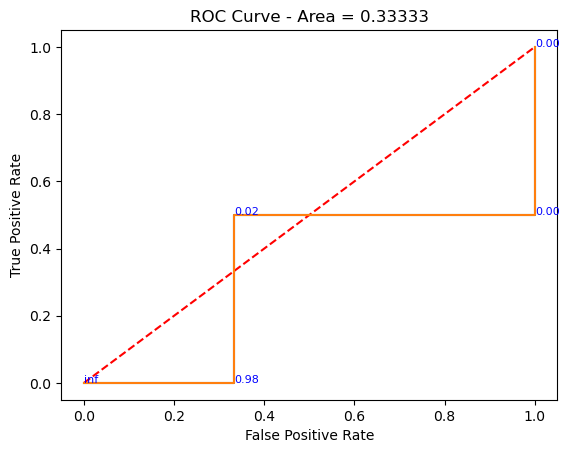

In [211]:
# analyse threshold 
# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=2, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, threshold = roc_curve(y, y_pred[:, 1]) # 2 first argument --> plot the curve / last calculate the threshold 
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

#plot ROC 
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.plot(fpr, tpr) 
for i, th in enumerate(threshold):
    plt.annotate(f'{th:.2f}', (fpr[i], tpr[i]), fontsize=8, color='blue')
plt.title("ROC Curve - Area = {:.5f}".format(auc_score))


In our case, if we want to sell cars quickly, the model should limit the number of false positive as much as possible, as we would rather discount cars that would have been sold anyways than not discount cars that should be and therefore won't be sold. In order to do this, we should increase the threshold. 

In general : increasing the threshold will increse the recall (R=1), while the precision will decrease (P=0). --> the hyper parameter of the model 

To know more about how our model performs we plotted the ROC curve.

Y-axis : true-positive rate = TP/(TP+FN)--> recall 
X-axis : false positive = FP/(FP+TN) --> falsy negative rated as positive 

The ROC AUC of the model is 0,33, far from 1. <br>
If random ordering ROC AUC = 0,5 <br>
The ROC AUC is the area under this curve that capture the overall quality of the classifier, the closest it is to the number 1 the better : in our case we have a ?? ROC AUC.
Folowing the curve (up) --> decreasing the threshold 

In [213]:
X.columns
# Is test surviving ? 
test = [25, 0, 0, 100, 0, 1] # each number repensetn the value of eahc feature / X.columns and test same size ! 
if logistic.predict([test])[0] > 0 : 
    print(logistic.predict([test]))
    print(logistic.predict_proba([test])[0])
    print("1")#"YES"
else : 
    print("0")
    print(logistic.predict([test])) # either 0 (died) or 1 (survied)
    print(logistic.predict_proba([test])[0]) #[proba of being 0  proba of being 1]

from scipy.stats import ttest_ind
#distribution probabilitie of test 
logistic.predict_proba([test])
proba = logistic.predict_proba([test])
plt.bar(['Not Survived', 'Survived'], proba[0])
plt.ylabel('Probability')
plt.title('Probability Distribution for Test Sample')
# Perform a t-test
t_stat, p_value = ttest_ind(proba[0], [0.5, 0.5])
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# p-value >0,05 statisticly significant 
plt.show()

0
[0]
[9.99999995e-01 4.53191039e-09]


In [ ]:
# 1 : present the data --> show the response / target value (0,1)
print(data_df['sold_within_3_months'].value_counts())

# 2 : get categorical data to numerical 
data_df = pd.get_dummies(data_df, columns=['FuelType', 'MetColor', 'Automatic', 'Doors'], drop_first=True) # drop_first important ! 

# 3 : split the data tragte / features 
y_df = data_df['sold_within_3_months']
X_df = data_df.drop(columns=['sold_within_3_months'])

# 4 : Split the data train test 
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42) # 0,2 --> 80-20 split 
print(f"No. of training samples: {len(X_train)} No. of testing samples: {len(X_test)}")

# 5 : Standarize the feature 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 # add a constant
X_train = sm.add_constant(X_train) 
X_test = sm.add_constant(X_test)

# 6 : fit to a logisitic regresion model for the train data 
logistic_regression_model = sm.Logit(y_train, X_train).fit() # X standarized
print(logistic_regression_model.summary())

# Fit the logistic regression model
logistic = LogisticRegression(solver='liblinear', random_state=42)
logistic.fit(X_train.values, y_train) # X standarized 
# liblinear : better parameter for small data set 

# 7 : METRICS 
from sklearn.metrics import accuracy_score
# prediction values 
y_pred_p_logistic = logistic_regression_model.predict(X_test) # X_test STRANDARIZED 
y_test_pred_logistic = np.where(y_pred_p_logistic > 0.5, 1, 0)
Y_pred_test_3 = logistic.predict(X_test) # X_test standarized ! 



def accuracy_fn(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_fn(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    if tp + fp == 0:
        return 0.0  # Define precision as 0 when no positive predictions
    return tp / (tp + fp)

def recall_fn(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    if tp + fn == 0:
        return 0.0  # Define recall as 0 when no positive true labels
    return tp / (tp + fn)

def f1_score_fn(y_true, y_pred):
    prec = precision_fn(y_true, y_pred)
    rec = recall_fn(y_true, y_pred)
    if prec + rec == 0:
        return 0.0  # Define F1-score as 0 when both precision and recall are 0
    return 2 * prec * rec / (prec + rec)


accuracy  = accuracy_fn(y_test, y_pred)
print("The accuracy score is : %0.3f" %accuracy) 
#All the calculation made are using the function created in part 2
#Precision:
precision = precision_fn(Y_test_3, Y_pred_test_3)
print("Precision: %0.3f "%precision)

#Recall: 
recall = recall_fn(Y_test_3, Y_pred_test_3)
print("Recall: %0.3f "%recall)

#F1-score : 
F1  = f1_score_fn(Y_test_3, Y_pred_test_3)
print("F-1 score : %0.3f"%F1 )


print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", F1)

#IF allowed use metrics from sklearn 
import sklearn.metrics

print("Accuracy:", sklearn.metrics.accuracy_score(true_labels, predicted_labels))
print("Precision:", sklearn.metrics.precision_score(true_labels, predicted_labels))
print("Recall:", sklearn.metrics.recall_score(true_labels, predicted_labels))
print("F1-Score:", sklearn.metrics.f1_score(true_labels, predicted_labels))


## Tree DecisionTreeClassifer

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 0,2 --> 80-20 split 


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=42)

decision_tree_classifier.fit(X_train, y_train)

In [ ]:
y_test_pred_rf = decision_tree_classifier.predict(X_test)

print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_test_pred_rf))
# comparing to a random classier 1/ # of categories 
conf_matrix_df = pd.DataFrame(tree_conf_matrix, index=map_char_to_int, columns=map_char_to_int)


In [ ]:

fig, ax = plt.subplots()
im = ax.imshow(tree_conf_matrix)
for i in range(len(map_char_to_int)):
    for j in range(len(map_char_to_int)):
        text = ax.text(j, i, "{:.3f}".format(tree_conf_matrix[i, j]),
                       ha="center", va="center", color="w")
ax.set_xticks(range(len(map_char_to_int)), labels=map_char_to_int,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(map_char_to_int)), labels=map_char_to_int)

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues');
#plt.ylabel(map_char_to_int, fontsize=12)
plt.legend(map_char_to_int, fontsize=12)
plt.show()

 F. Analyzing the error matrix confusion matrix 
 - Monica is the most distinct character in the way she talks (highest value on the diagonal).
 - Monica and Chandler are the most similar (highest value outside of the diagonal).
 - Chandler and Phoebe (lowest value outside of the diagonal).


In [ ]:
from sklearn.metrics import confusion_matrix

tree_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
tree_conf_matrix = np.divide(tree_conf_matrix,tree_conf_matrix.sum(axis=0).sum())#normalized
print(tree_conf_matrix)

## Random Forest :scikit-learn

In [214]:
# Load the data
titanic = pd.read_excel('data/titanic.xls')
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived']

FileNotFoundError: [Errno 2] No such file or directory: 'data/titanic.xls'

In [216]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [n for n in range(1, 21)] # 1 to 20 tree
precision_scores = []
recalls_scores = []


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=nt) # depth max =3 
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=2, scoring="precision") # crossvalidation : cv = 10 
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=2, scoring="recall")
    recalls_scores.append(recall.mean())

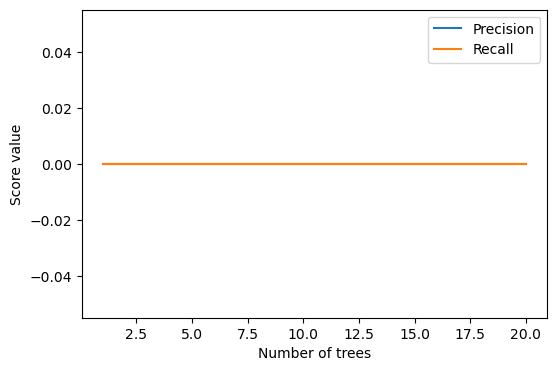

In [217]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()

## SGDClassifier + Pipeline + varie parameter + Cross vect 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, balanced_accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

parameters = {
    'clf__alpha': [1e-4],    
}

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(penalty='l2', loss='log_loss', max_iter=5, tol=None, random_state=42))
])

tstart = time.time()
gs_clf = GridSearchCV(text_clf, parameters, cv=5)
gs_clf = gs_clf.fit(X_train, y_train)
tend = time.time()
print(tend-tstart)
predicted = gs_clf.predict(X_test)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, predicted))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(article_1_last["content"].values, 
                                                        article_1_last["topic"], test_size=0.3, random_state=42)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
clf = SGDClassifier(random_state=42, loss="log_loss",max_iter=5,tol=None,alpha=np.exp(-4)).fit(X_train, Y_train)
y_pred = clf.predict(X_test)

# faire varier le parametre 
parameters = { # si pas de pipline appeler le parametre juste alpha 
    'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
}
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
clf = SGDClassifier(random_state=42, loss="log_loss",max_iter=5,tol=None).fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [ ]:
# testing parameter 
# varie parameter 
parameters = { # si pas de pipline appeler le parametre juste alpha 
    'clf__alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
}

text_clf_small = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(penalty='l2', loss='log_loss', max_iter=5, tol=None, random_state=42, class_weight='balanced'))
])

tstart = time.time()
gs_clf_small = GridSearchCV(text_clf_small, parameters, cv=5)
gs_clf_small = gs_clf_small.fit(X_train_small, y_train_small)
tend = time.time()
print(tend-tstart)
predicted_small = gs_clf_small.predict(X_test_small)


In [ ]:
# balanced accuracy --> if data weigted 
print(balanced_accuracy_score(y_test_small, predicted_small))
print(classification_report(y_test_small, predicted_small, digits=3))
print(confusion_matrix(y_test, predicted))

## Supervised K-NN : cikit-learn

Text(0.5, 1.0, 'Circles')

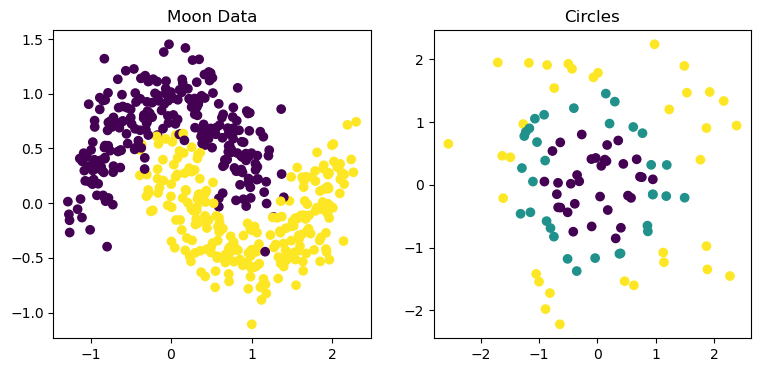

In [219]:
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
#data
X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')

In [220]:
from matplotlib.colors import ListedColormap
#Plotting function to predict the class of different areas of the features space.
def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

In [221]:
# Create the models for both dataset with K=1 and K=15. --> number of neigbhors 
# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)


KNeighborsClassifier(n_neighbors=15)

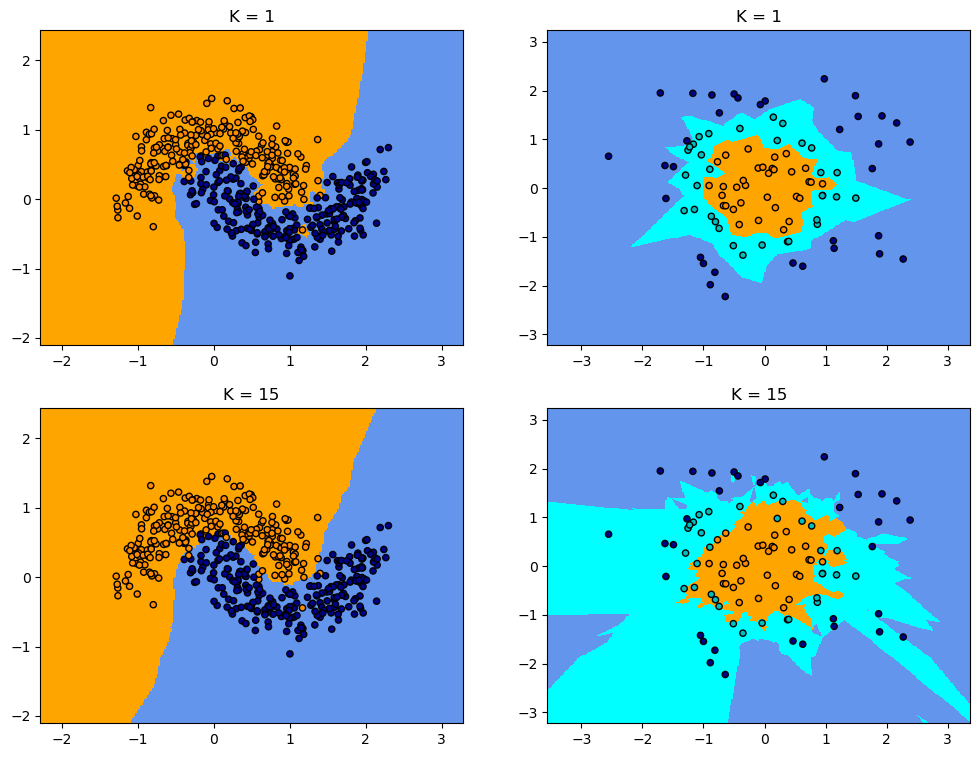

In [222]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)

# Unsupervised learning 


### Clusters in data

In [1]:
#packages 
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#### K-means : <br>
    - random sample : pick a random subset of k points from the dataset 
    - NP hard pb 
    - K-means++ : iteratively construct a random sample with good spacing acrosse the dataset --> improve k-means
    - finding an optimal k-means clsutering --> NP-hard 
    - performance : influence d by the 1st chosen centroid 
    - favor clusters that are spherical 

properties : <br>
    - greedy algo with random initialization --> solution may be **suboptimal** <br>
    - vary significantly with different initial points <br>
    - converges <br>
    - Performance : O(nk) wich is ok <br>
        n--> number of points in the data set / k--> number of cluster <br>
    - great for data condensed / compressed <br>
    - variants : fixed/size cluster / soft clustering <br>

drawbacks : <br>
    - **LOCAL BUT NON_GLOBAL OPTIMUM**<br>
        solution : initialization with k-means++ // re-running with diff initialisation <br>
    - requires the notion of mean <br>
    - k clusters fixed in advance <br>
    - not good with noisy data and outliers --> can amplified the outliers <br>
    - **ONLY CONVEX SHAPE** --> convex polyhedra <br>



In [3]:
#data initialization --> here ther ise an imposed a number of cluster randomly 
random.seed(42)
top_secret_number = random.randint(2, 10)
total_samples = 100
# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=2,
                           n_features=2,
                           return_centers=True, # important if we want the centroids 
                           random_state=42)

X[:3]
#centers : ndarray of shape (n_centers, n_features)
       # The centers of each cluster. Only returned if
       # ``return_centers=True``.

array([[-8.57321463, -9.90980404],
       [ 6.26691327, -0.48855895],
       [-3.44814639, 10.09940622]])

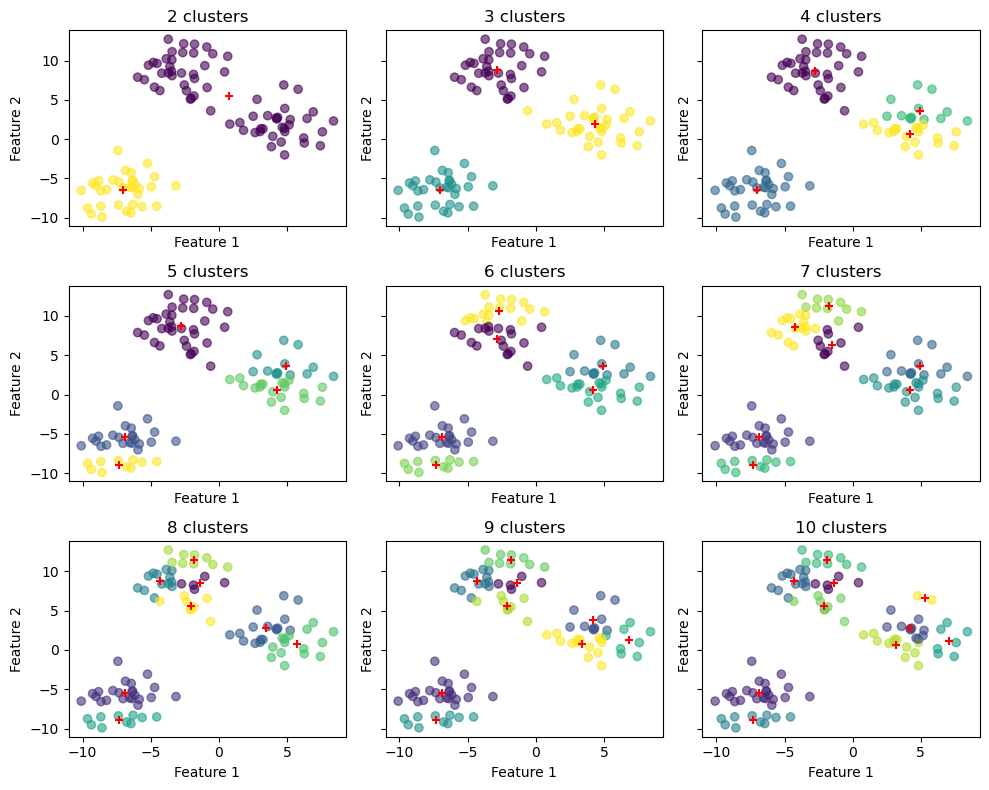

In [4]:
# varie the number of cluster from 2 to 10 + visualization 
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10
# Compute number of row and columns
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)
# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

#### Number of cluster 
How to choose the optimal number of cluster ? 
2 methods : silhouettes score / Elbow method <br>

Silhouette suggests that using k (highest values of silhouettes) clusters is a fair tradeoff between the number of groups and their separation. 
The elbow method shows how the SSE reduction is less significant with more than k clusters.

Stock the coordinates of the clusters 

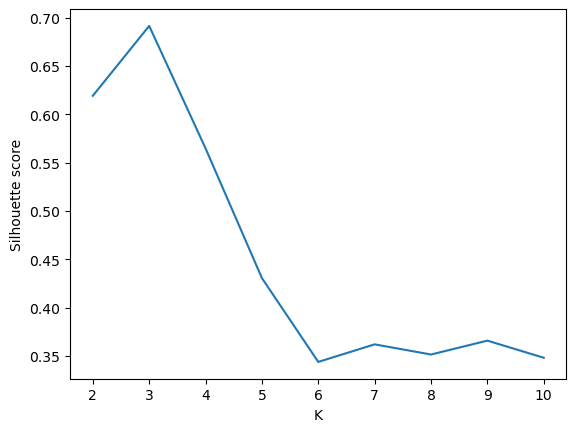

SSE reduction is less significant 0.6913486528517042 
best k = 3


In [66]:
def plot_silhouettes(features_X, start=2, end=11):
# Try multiple k
    silhouettes = []
    for k in range(start,end):
        # Cluster the data and assigne the labels
        labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
        # Get the Silhouette score
        score = silhouette_score(X, labels)
        silhouettes.append({"k": k, "score": score}) # stock les données 
    # Convert to dataframe
    silhouettes = pd.DataFrame(silhouettes)

    # Plot the data
    plt.plot(silhouettes.k, silhouettes.score)
    plt.xlabel("K")
    plt.ylabel("Silhouette score")
    plt.show()

    print("SSE reduction is less significant %s" %silhouettes.score.max(), "\nbest k = %s" %silhouettes.k[silhouettes.score.idxmax()])
    K_best=silhouettes.k[silhouettes.score.idxmax()]

plot_silhouettes(X)

# Pick K where S is the highest 
# S_i = bi - ai / max(ai, bi) where bi = mean dist to points in closest other cluster / ai mean dist to points in same cluster

SSE reduction is less significant 687.643938362309 
best k = 3


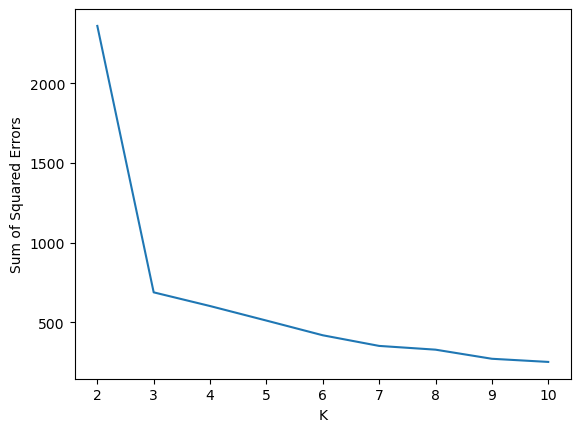

In [67]:
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})
        # inertia_ : float
        # Sum of squared distances of samples to their closest cluster center,
        # weighted by the sample weights if provided.
    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")

    return sse

sse = plot_sse(X)

print("SSE reduction is less significant %s" %sse.sse[1], "\nbest k = %s" %sse.k[1])

   Feature 1  Feature 2
0  -7.023792  -6.472324
1   4.359141   1.904671
2  -2.826410   8.857235


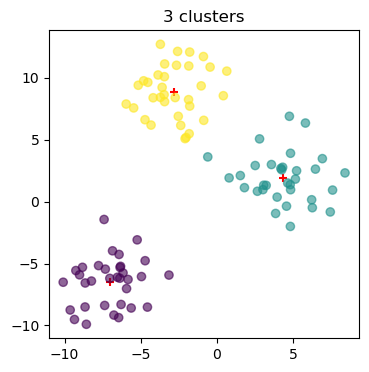

In [68]:
#print the best cluster 
fig, axs = plt.subplots(1, 1, figsize=(4,4), sharey=True)

# Plot the clusters with K = 3
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X)
# Plot the centroids
#u = []
for u in KMeans(n_clusters=3, random_state=0).fit(X).cluster_centers_:
    axs.scatter(u[0], u[1], marker="+", color="red")
    # Stock the coordinates of each centroid in a dataframe
    centroids_df = pd.DataFrame(KMeans(n_clusters=3, random_state=0).fit(X).cluster_centers_, columns=['Feature 1', 'Feature 2'])

axs.scatter(X[:,0], X[:,1], c=labels, alpha=0.6)
axs.set_title("3 clusters")

print(centroids_df) # coordinates of each centroid for each cluster


#### DBSCAN
Data with complex shape --> **DBSCAN**
    - densitiy based 
    - core points : have at leats minPts neighbors ina sphere of diameter eps around them 
    - varie eps value to found the best number of clusters 
    - arbitrary shapes (not only convex cluster like k-means)
    - no specific clusters in advance
    - does not depend on the inisialization but the eps -->diameter of the sphere 

Performance = O(nlog(n))

 """Perform DBSCAN clustering from vector array or distance matrix.

    DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
    Finds core samples of high density and expands clusters from them.
    Good for data which contains clusters of similar density.

    This implementation has a worst case memory complexity of :math:`O({n}^2)`,
    which can occur when the `eps` param is large and `min_samples` is low,
    while the original DBSCAN only uses linear memory.
    For further details, see the Notes below.

     eps : float, default=0.5
        The maximum distance between two samples for one to be considered
        as in the neighborhood of the other. This is not a maximum bound
        on the distances of points within a cluster. This is the most
        important DBSCAN parameter to choose appropriately for your data set
        and distance function.

   Feature 1  Feature 2  Cluster
0  -0.194824   0.580292        1
1   1.194533  -0.086290        2


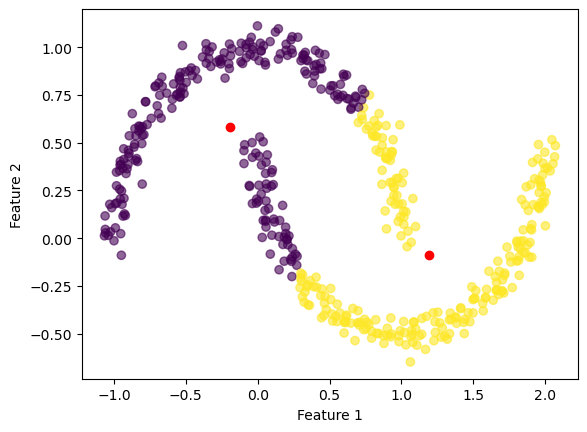

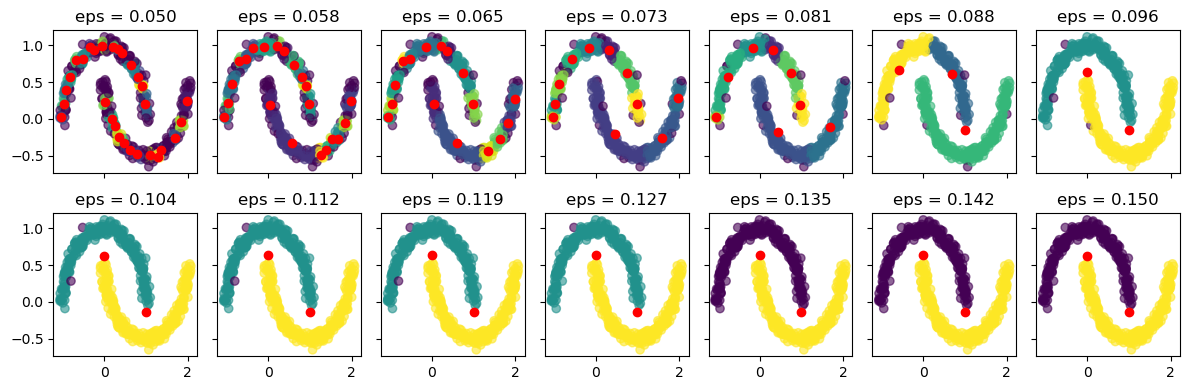

In [69]:
# Create 500 random points with 2-moons shape
X_moons, _ = make_moons(500, noise=0.05, random_state=0)
#visualization of the data 
#plt.scatter(X_moons[:,0], X_moons[:,1], alpha=0.6)
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")
kmean = KMeans(n_clusters=2, random_state=0).fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=kmean.labels_, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the centroids
for c in kmean.cluster_centers_:
    plt.scatter(c[0], c[1], marker="o", color="red")
# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14)

# Compute number of row and columns
COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)
#sharey --> share the same axes 
for i in range(0, len(eps_list)):
    eps = eps_list[i]
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_moons)
    ax.scatter(X_moons[:,0], X_moons[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    # Plot the centroids of the DBSCAN
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[DBSCAN(eps=eps).fit(X_moons).core_sample_indices_] = True
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            # Black used for noise.
            col = 'k'
        else:
            col = plt.cm.Spectral(float(label) / len(unique_labels))
        class_member_mask = (labels == label)
        xy = X_moons[class_member_mask & core_samples_mask]
        if len(xy) > 0:
            centroid = xy.mean(axis=0)
            ax.scatter(centroid[0], centroid[1], marker='o', color='red')
        # Extract the centroids coordinates into a dataframe
        centroids_df = pd.DataFrame(kmean.cluster_centers_, columns=['Feature 1', 'Feature 2'])
        centroids_df['Cluster'] = range(1, len(centroids_df) + 1)   

    
plt.tight_layout()

print(centroids_df)

#### High dimensional data : t-SNE / PCA
 - t-SNE 
 - PCA 
both reducted the space to n-D 
NOT THE SAME VALUE --> optimize different objective 

The features of the first sample are: [-11.187046  10.510167]
The features of the first sample are: [-13.21730602  -0.95538482]


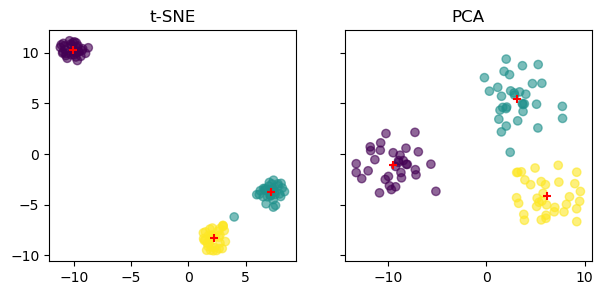

In [70]:
#n_components : int, optional (default: 2) // number of dim 

#t-SNE
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(X)
print("The features of the first sample are: %s" % X_reduced_tsne[0])

#PCA
X_reduced_pca = PCA(n_components=2).fit(X).transform(X)
print("The features of the first sample are: %s" % X_reduced_pca[0])
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

# Cluster the data in 3 groups
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X) 

# Plot the data reduced in 2d space with t-SNE
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[0].set_title("t-SNE")
for c in KMeans(n_clusters=3, random_state=0).fit(X_reduced_tsne).cluster_centers_:
    axs[0].scatter(c[0], c[1], marker="+", color="red")

# Plot the data reduced in 2d space with PCA
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")
for c in KMeans(n_clusters=3, random_state=0).fit(X_reduced_pca).cluster_centers_:
    axs[1].scatter(c[0], c[1], marker="+", color="red")

#### Apply to a data set : 

- Create a dataset by keeping only the meaningful features. Remove the type.
- Plot the histogram of the different features.
- The features have different scales, but we want to give the same importance to all them. Find a way to mitigate the problem.

Scaled sample: [-1.07587407  0.90160677  0.60877281 -0.55526957]


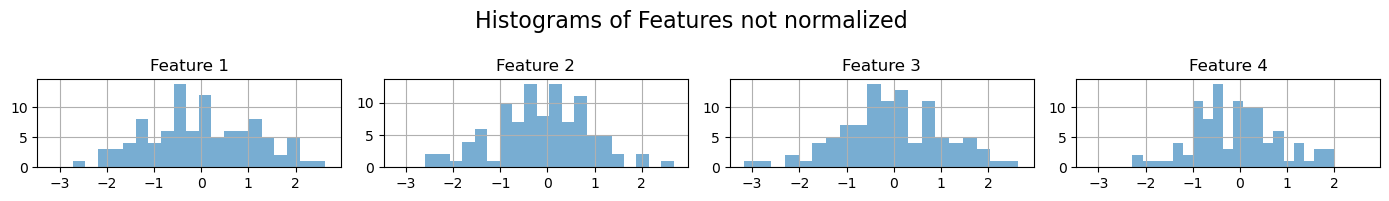

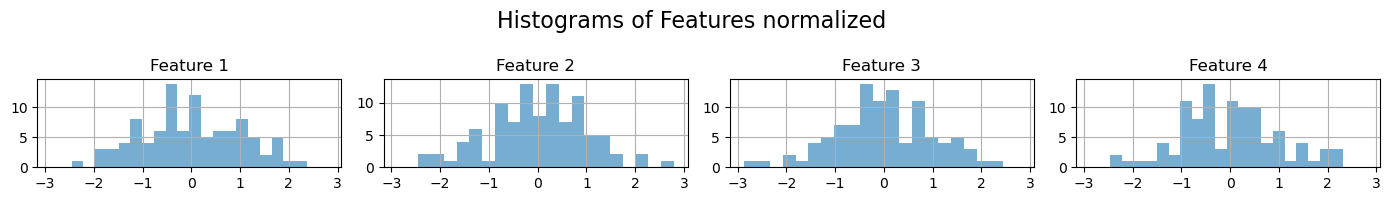

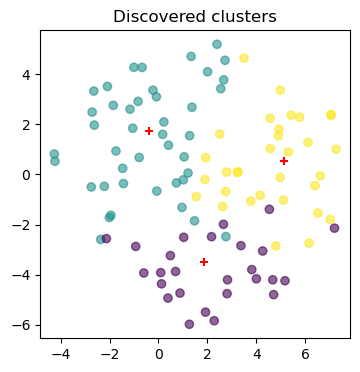

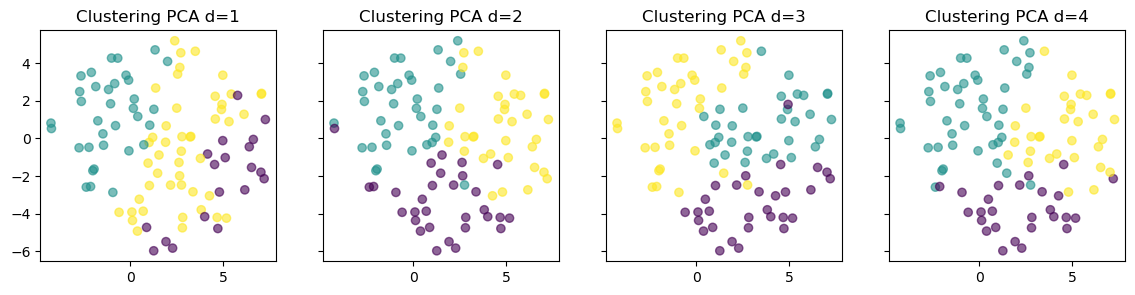

In [79]:
#Load data
#data = pd.read_csv("data.csv")
#data.head()
# Create a random dataframe with 4 columns
X = pd.DataFrame(np.random.randn(100, 4), columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
#drop the unmeaningful columns
X = X#.drop("ID", axis=1).drop("seedType", axis=1)
columns = X.columns

#Data visualization of each feature --> histogram of each feature = each column**
fig, axs = plt.subplots(1, len(columns), figsize=(14,2), sharex=True)
fig.suptitle("Histograms of Features not normalized ", fontsize=16)

for column_idx in range(0, len(columns)):
    X[columns[column_idx]].hist(bins=20, ax=axs[column_idx], alpha=0.6)
    axs[column_idx].set_title(columns[column_idx])
plt.tight_layout()

#IF different scale --> standardize the data**
scaled_features = StandardScaler().fit(X).transform(X)
print("Scaled sample: %s" %scaled_features[0])

#Re-vilualization of the data after standardization

scaled_features = pd.DataFrame(scaled_features)
col = scaled_features.columns
fig, axs = plt.subplots(1, len(col), figsize=(14,2), sharex=True)
fig.suptitle("Histograms of Features normalized ", fontsize=16)
for column_idx in range(0, len(col)):
   scaled_features[column_idx].hist(bins=20, ax=axs[column_idx], alpha=0.6)
   axs[column_idx].set_title(columns[column_idx])
plt.tight_layout()

#choose Number of cluster** 
#Elbow or silhouette --> USE THE STRANDARIZED DATA 
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(scaled_features)

#Visualize Cluster

#- TSE : 
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(scaled_features)
labels = KMeans(n_clusters=3, random_state=0).fit_predict(scaled_features)

fig, axs = plt.subplots(1, 1, figsize=(4,4), sharey=True)
axs.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs.set_title("Discovered clusters")
for c in KMeans(n_clusters=3, random_state=0).fit(X_reduced_tsne).cluster_centers_:
    axs.scatter(c[0], c[1], marker="+", color="red")

#- PCA : here clustering with diferent dimension --> dim = a feature 
fig, axs = plt.subplots(1, 4, figsize=(14, 3), sharey=True)

for i in range(0, 4):
    X_reduced_pca = PCA(n_components=i+1).fit(scaled_features).transform(scaled_features)
    labels = KMeans(n_clusters=3, random_state=0).fit_predict(X_reduced_pca)
    axs[i].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
    axs[i].set_title("Clustering PCA d=%s"% (i+1))

#If you want to fix the layering 
#fig, axs = plt.subplots(2, 7, figsize=(20, 6), sharey=True)

#for i in range(0, 12):
 #   X_reduced_pca = PCA(n_components=i+1).fit(scaled_features).transform(scaled_features)
  #  labels = KMeans(n_clusters=3, random_state=0).fit_predict(X_reduced_pca)
   # row = i // 7
    #col = i % 7
    #axs[row, col].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
    #axs[row, col].set_title("PCA d=%s" % (i+1))

#plt.tight_layout()


#### Quizz

Which of the following real-world ML applications is not unsupervised learning?
1. Netflix matrix factorization pipeline to discover users with similar interests
2. **Speaker recognition (recognition of the identity of who is talking) in phones and smart assistant devices**
3. LDA topic modeling on Twitter content to discover customers' opinions about a product
4. K-means clustering of Web domains 

2) --> voice is labeled 

Which of the following is true for the k-means clustering algorithm?

1. It always converges to a global optimum.
2. **In each iteration, points are assigned to the closest centroid and the new centroids are recomputed.**
3. It outputs the optimal number of clusters.
4. None of the above.

2) --> always converges but not the optimal --> to a sub-optimal than can be or not optimal

Dendogram : 
    - bottom linked --> a part of the first grouped data points 
    - N data point --> N-1 split points 
    - performance : log(N)
    - agglomerative clustering
    - can be no euclidean 


# Networks 

In [81]:
# packages 

# !pip install networkx python-louvain
import networkx as nx
import numpy as np 
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import collections
from community import community_louvain
from networkx.algorithms.community.centrality import girvan_newman
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
nx.__version__

'3.3'

## Network Graph 

[1, 2, 3, 4, 5, 6, 7, 8]
Graph with 8 nodes and 10 edges


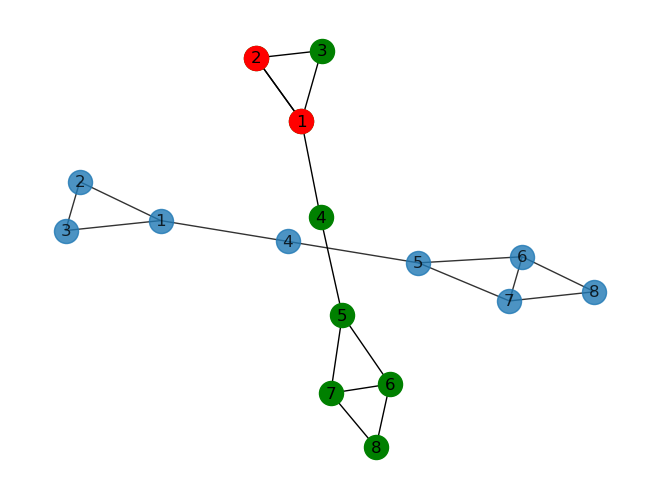

In [100]:
G = nx.Graph() # for a directed graph use nx.DiGraph()
G.add_node(1) # add a single node 
G.add_nodes_from(range(2,9))  # add multiple nodes at once
G.add_edge(1,2)# add edges 
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges) #add multiple edges 
print(G.nodes()) # name of the nodes 

print(G) # get info on number of nodes / number of edges 
#Plot a network 
# draw_spring : force-directed (spring-based) layout for your graph / working with small to medium graphs that need a natural, well-spaced appearance.
nx.draw_spring(G, with_labels=True,  alpha = 0.8)

# use draw : flexibility in choosing or specifying the layout / experimenting with different layouts for better visualization.
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels =True, node_color='green')  # Draw the original graph
nx.draw(G.subgraph([0, 1, 2]), pos=pos, node_color="red") # highlight a sub-graph 


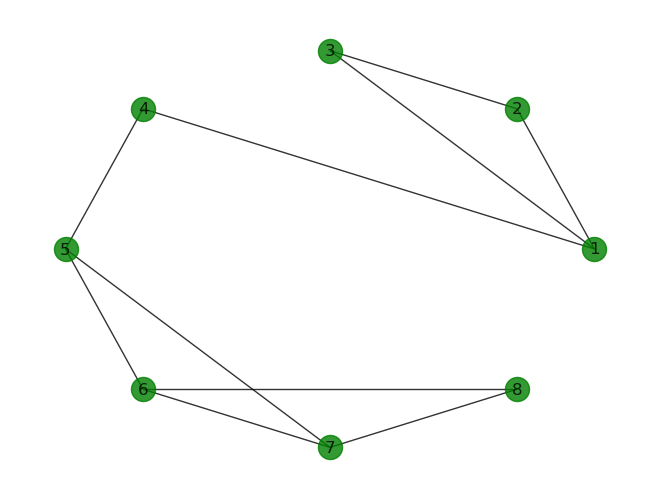

In [101]:
# Draw the graph with a circular layout instead?
nx.draw_circular(G, with_labels=True,  node_color='g', alpha = 0.8)

### Adjacency matrix 

In [ ]:
# Example adjacency matrix
adj_matrix = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
])
# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)
# Draw the network
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_size=700, node_color="lightblue", font_weight="bold")
plt.title("Network from Adjacency Matrix")
plt.show()
#d = plot_degree_distribution(G)
u = describe_graph(G)

## Helper function plotting the degree distribution of a Graph / Graph properties / visualization 

In [93]:
# Helper function for plotting the degree distribution of a Graph
# it is possible to do an histopgram alsooooo
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)
# outup histogram frequecie of the degree 


In [ ]:
# plot in degree distribution 
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
fig, axes = plt.subplots(2, 2, figsize = (15,10),gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
fig.suptitle("In and out degree distribution of the Wikispeedia Network (Left: linear axes, Right: Log axes)", fontsize=20)
axes[0][0].plot(range(len(in_degree_freq)), in_degree_freq, 'go-', label='In-degree')
axes[0][1].loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='In-degree') 
axes[1][0].plot(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='Out-degree')
axes[1][1].loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='Out-degree')

In [ ]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(G)
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

# Funtion output 
#Graph with n nodes and m edges
#Avg. Shortest Path Length: avg of the number of edges need to relie 2 nodes using shortest path 
#Diameter : longest shortest path
#Sparsity: (0,1) : nbr edges/ nbr max edges-complete-graph
#Global clustering coefficient aka Transitivity: (0,1)

### Metrics 

A triplet is a set of three nodes that are connected by edges.

**Transitivity** (Global Clustering Coefficient) = Number of closed triplets (triangles)/ Total number of triplets (open and closed)

High Transitivity: Indicates a graph with many interconnected clusters or communities.
Low Transitivity: Suggests a sparse graph with fewer interconnected groups.
A fully connected graph (clique) has transitivity = 1 as every triplet is closed.
A tree structure (no cycles) has transitivity = 0, as no triangles exist.
Transitivity is a global measure of the clustering in the entire graph.

local transivity = clustering coefficient : calculates the same tendency for a single node and then averages over all nodes.
quantifies for a node how close its neighbours are to being a clique (complete graph). 
Measured as the ratio of, the number of edges to the number of all possible edges, 
among the neighbors of a node.
k_i < 1 --> C =0 
C = 2 * E /k_i*(k_i-1) with E : edge between neighbors of i 

edge : 3* number of triangle /number of connected triplets of vertices 

**Diameter** : 
    - graph's "size" in terms of distances
    - longest shortest path between any two nodes in the graph
    - Small Diameter: Indicates a highly connected graph, where all nodes are relatively close to each other.
    - Large Diameter: Indicates a more spread-out graph, with some nodes far apart.

**Sparsity** 
number of edges / max possible number of edges 
m : edges 
n : nodes 
Sparsity = 1 - 2m/(n(n-1))

In [95]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

In [97]:
n = 10  # 10 nodes
m = 20  # 20 edges
erG = nx.gnm_random_graph(n, m) # random graph with imposed number of nodes/edges 

#describe_graph(erG)
#visualize_graph(erG, k=0.05, alpha=0.8)
#plot_degree_distribution(erG)

Graph with 10 nodes and 20 edges
Avg. Shortest Path Length: 1.6667
Diameter: 3.0000
Sparsity: 0.4444
Global clustering coefficient aka Transitivity: 0.4286


## Analysis a network 

In [ ]:
#clean data frame 
nodes = pd.DataFrame()
# transform the type of categorical freatures if not all ready is 
nodes.Gender = nodes.Gender.astype('category')
# change col name --> easier 
nodes = nodes.rename({'Historical Significance': 'Role'}, axis = 1)
# Check for missing values : 
nodes['Role'].isna().sum()
nodes['Role'].fillna('Unknown', inplace=True)
nodes['Role'].isna().sum()

# let's also add a new attribute based on the role column. Is (s)he a directly involved Quaker or not? 
nodes['Quaker'] = ['quaker' in role.lower() for role in nodes.Role] # no missing values to do this 

# edges --> connection between nodes 
edges = pd.read_csv(data_folder + 'quakers_edgelist.csv')
edges.head()


### Data frame to network 

#### Initialization of the network and its graph 

In [ ]:
# 1 choose the type of network : direct or undirect 

#undirected network : 
# friends is a symmetric relation, we will build an undirected graph.
quakerG =nx.from_pandas_edgelist(edges, 'Source', 'Target', edge_attr=None, create_using= nx.Graph())

# directed network : 
quakerG = nx.from_pandas_edgelist(edges, 'Source', 'Target', edge_attr=None, create_using=nx.DiGraph())

# Works Only if you don't have isolated nodes ! 

In [ ]:
# 2 : add to the nodes features = columns 

# add node attributes by passing dictionary of type name -> attribute
nx.set_node_attributes(quakerG, nodes['Role'].to_dict(), 'Role' )
nx.set_node_attributes(quakerG, nodes['Gender'].to_dict(), 'Gender' )
nx.set_node_attributes(quakerG, nodes['Birthdate'].to_dict(), 'Birthdate' )
nx.set_node_attributes(quakerG, nodes['Deathdate'].to_dict(), 'Deathdate' )
nx.set_node_attributes(quakerG, nodes['Quaker'].to_dict(), 'Quaker' )

# since the names are unique, index based on names --> nodes are linked to the name now 
# easier to call the name of the node then the ID 
nodes.set_index('Name', inplace=True)

# You can easily get the attributes of a node
quakerG.nodes['William Penn'] # Here the name is call and not the ID because of the line before 

In [ ]:
# 3 : visualized the graph 

visualize_graph(quakerG, False, k=0.2, alpha=0.4, node_shape='.') #False --> not the number of the node 
# better visualized : varie k (start 0,05 --> 0.2 ) / node_shape smaller ('o' default --> '.')

After visualisation : 
    - look if the graph is connected or not ? Are their isolated communities 
    - few nodes with a lot of connections ? --> hubs =giant component

#### Numbers and graph properties 

In [ ]:
# 1 : sparsity = nbr edges/ nbr max edges-complete-graph = E/n(n-1)/2
print("Network sparsity: %.4f" %nx.density(quakerG)) 

# 2 connected graph ?
print(nx.is_connected(quakerG)) # false if not connected true if connected 
comp = list(nx.connected_components(quakerG)) #--> node connected together 
print('The graph contains', len(comp), 'connected components')

# directed graph :
# weakly connected graph  
nx.is_weakly_connected(G)
print(f"number of weakly connected componets: ", nx.number_weakly_connected_components(G))
largest_cc = max(nx.weakly_connected_components(G), key=len)
print(len(largest_cc))
lcc_G = G.subgraph(largest_cc) # largest_comp = max(comp,key=len )
print(lcc_G)

#stongly connected directed graph
nx.is_strongly_connected(G)
print(f"number of strongly connected componets:", nx.number_strongly_connected_components(G))
largest_s_cc = max(nx.strongly_connected_components(G), key=len)
print(len(largest_s_cc))
lcc_s_G = G.subgraph(largest_s_cc) # largest_comp = max(comp,key=len )
print(lcc_s_G)

# 3 find the hub / giant component --> often the case 
largest_comp = max(comp, key=len)
percentage_lcc = len(largest_comp)/quakerG.number_of_nodes() * 100
print('The largest component has', len(largest_comp), 'nodes', 'accounting for %.2f'% percentage_lcc, '% of the nodes') 

# 4 shortest path between 2 nodes in the same component : 
fell_whitehead_path = nx.shortest_path(quakerG, source="Margaret Fell", target="George Whitehead") # source and target --> col of the edges data frame 
# how the different nodes are connected 
print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

# 5 : longest shortest-path 
# take the largest component and analyse its diameter = longest shortest-path
lcc_quakerG = quakerG.subgraph(largest_comp) # largest_comp = max(comp,key=len )
print("The diameter of the largest connected component is", nx.diameter(lcc_quakerG))
print("The avg shortest path length of the largest connected component is", nx.average_shortest_path_length(lcc_quakerG))

#### How the nodes are conected together : Social look 

**Triadic Closure:**   
    A *friend* of my *friend* is my *friend*   
    OR   
    *quaker_1* knows *quaker_2* and *quaker_2* knows *quaker_3*, how likely is that *quaker_1* and *quaker_3* know each other?

Employ a **global** measure called **transitivity** (aka global clustering coefficient), or the ratio of all existing triangles (closed triples) over all possible triangles (open and closed triplets).

In [ ]:
# 1 Triadic closure / Transitivity --> Global
print('%.4f' %nx.transitivity(quakerG))

# 2 : local = clustering coefficient 
print(nx.clustering(quakerG, ['Alexander Parker', 'John Crook']))
# John Crook has a higher clustering coefficient so more in a communauty
#result are in % of how much the node is connected 
#look at sub graphs : 
subgraph_Alex = quakerG.subgraph(['Alexander Parker']+list(quakerG.neighbors('Alexander Parker')))
subgraph_John = quakerG.subgraph(['John Crook']+list(quakerG.neighbors('John Crook')))
nx.draw_spring(subgraph_Alex, with_labels=True)

len(G.edges())/len(G.nodes()) # average degree 
# folows a power law --> log log representation 
# linear with these scale 

#### Which node is more important ? 
* Degree : more node connection more important 
* Katz : measures the relative influence of a node in a network, taking into account the number and quality of its neighbors (both direct and indirect connections). 
    2/3 od distances are taken into account 
    more robust then degree centrality 
* Betweeness centrality : the more shortest paths pass through a node, the more important it is. Expensive 
* Page Rank : 
    - with any type of graph  

In [ ]:
# Degree : more node connection more important 
degrees = dict(quakerG.degree(G.nodes())) # return -> ('Name', degree)... DICT : type dictionary 
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True) #sorted by second argument (degree)
# And the top 5 most popular quakers are.. 
for quaker, degree in sorted_degree[:5]:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'knows', degree, 'people')

# degree distribution : 
degree_seq = [d[1] for d in sorted_degree] # take second arg of sorted_degree --> the degree of each nodes 
degreeCount = collections.Counter(degree_seq) # count function 
degreeCount = pd.DataFrame.from_dict( degreeCount, orient='index').reset_index() # transform in a data frame 
fig = plt.figure()
ax = plt.gca()
ax.plot(degreeCount['index'], degreeCount[0], 'o', c='blue', markersize= 4)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.title('Degree distribution for the Quaker network')
# scatter plot : frequency / degree 
# smalll degree that appears a lot --> node not a lot connected 
# High degree that appears not a lot --> node with a lot of connection --> leader 

# As a bar plot
plot_degree_distribution(quakerG) # define before

In [229]:
# Katz centrality : generalisation over degree centrality 
#undirected network 
degrees = dict(quakerG.degree(quakerG.nodes()))
katz = nx.katz_centrality(quakerG) # katz 
nx.set_node_attributes(quakerG, katz, 'katz') # arg (G, values, 'name')
sorted_katz = sorted(katz.items(), key=itemgetter(1), reverse=True)

#Note that if the dictionary contains nodes that are not in `G`, the
#values are silently ignored

# And the top 5 most popular quakers are.. 
for quaker, katzc in sorted_katz[:5]:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'has katz-centrality: %.3f' %katzc)

# Directed graph : 
quakerG_directed = nx.DiGraph()
# Add edges (example data)
quakerG_directed.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D'), ('D', 'B')])
# Degrees for a directed graph
in_degrees = dict(quakerG_directed.in_degree())   # In-degree
out_degrees = dict(quakerG_directed.out_degree())  # Out-degree
# Katz centrality
katz_directed = nx.katz_centrality(quakerG_directed, alpha=0.1, beta=1.0)  # alpha : importance of indirect connections / beta : adds a constant baseline score to each node.
# Set the Katz centrality as a node attribute
nx.set_node_attributes(quakerG_directed, katz_directed, 'katz')
# Sort nodes by Katz centrality
sorted_katz_directed = sorted(katz_directed.items(), key=itemgetter(1), reverse=True)
# Display results
print("In-Degrees:", in_degrees)
print("Out-Degrees:", out_degrees)
print("Katz Centrality (Sorted):", sorted_katz_directed)

NameError: name 'quakerG' is not defined

In [230]:
# Directed graph : 
quakerG_directed = nx.DiGraph()
# Add edges (example data)
quakerG_directed.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D'), ('D', 'B')])
# Degrees for a directed graph
in_degrees = dict(quakerG_directed.in_degree())   # In-degree
out_degrees = dict(quakerG_directed.out_degree())  # Out-degree
# Katz centrality
katz_directed = nx.katz_centrality(quakerG_directed, alpha=0.1, beta=1.0)  # alpha : importance of indirect connections / beta : adds a constant baseline score to each node.
# Set the Katz centrality as a node attribute
nx.set_node_attributes(quakerG_directed, katz_directed, 'katz')
# Sort nodes by Katz centrality
sorted_katz_directed = sorted(katz_directed.items(), key=itemgetter(1), reverse=True)
# Display results
print("In-Degrees:", in_degrees)
print("Out-Degrees:", out_degrees)
print("Katz Centrality (Sorted):", sorted_katz_directed)

In-Degrees: {'A': 1, 'B': 2, 'C': 1, 'D': 1}
Out-Degrees: {'A': 1, 'B': 1, 'C': 2, 'D': 1}
Katz Centrality (Sorted): [('B', 0.5346456484431836), ('C', 0.49082223176844597), ('A', 0.48643990759528033), ('D', 0.48643990759528033)]


In [ ]:
# betweenness centrality
betweenness = nx.betweenness_centrality(quakerG)
# Assign the computed centrality values as a node-attribute in your network
nx.set_node_attributes(quakerG, betweenness, 'betweenness') # arg (G, values, 'name')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)
# 5 more important 
for quaker, bw in sorted_betweenness[:5]:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'has betweeness: %.3f' %bw)
# in average 24% of the shortest path passes threw William Penn 
#This implies he is a key intermediary in the network, playing a significant role in connecting other nodes 
# (people, groups, or entities) who might otherwise not be directly connected.

# visualization of betweeness centrality / katz 
# similar pattern
list_nodes =list(quakerG.nodes())
list_nodes.reverse()   # for showing the nodes with high betweeness centrality 
pos = nx.spring_layout(quakerG) #  returns   A dictionary of positions keyed by node
ec = nx.draw_networkx_edges(quakerG, pos, alpha=0.1) # quakerG = network , pos =Mapping
nc = nx.draw_networkx_nodes(quakerG, pos, nodelist=list_nodes, node_color=[quakerG.nodes[n]["betweenness"] for n in list_nodes], # to see katz replace "betweeness" by "katz"
                            alpha=0.8, node_shape = '.')#node_size=1200, font_color="white", font_weight="bold" other arg to personlized the plot 
plt.colorbar(nc)
plt.axis('off')
plt.show()
# yellow high betweness centrality 

The node with the **lowest degree** can be the one with the **highest betweeness centrality**. 
Edge betweeness is the number of shortest paths that pass through an edge. This brings us to --> Comunities 

#### Analyse communities 
* **Girvan Newman** : Edges possessing high betweeness centrality separate communities. Iteratively removing edges with the highest betweenness centrality. 
* **Louvain** : Initially every node is considered as a community. The communities are traversed, and for each community it is tested whether by joining it to a neighboring community, we can obtain a better clustering. 
    - Louvain : The Louvain Method is a popular algorithm used for community detection in networks. It identifies groups of nodes (called communities) that are more densely connected to each other than to the rest of the network. This method is widely used due to its speed and ability to handle large networks.

Iteration 1
([1, 2, 3, 4], [5, 6, 7, 8])
Iteration 2
([1, 2, 3], [4], [5, 6, 7, 8])
Iteration 3
([1, 2, 3], [4], [5], [6, 7, 8])
Iteration 4
([1], [2, 3], [4], [5], [6, 7, 8])
Iteration 5
([1], [2], [3], [4], [5], [6, 7, 8])


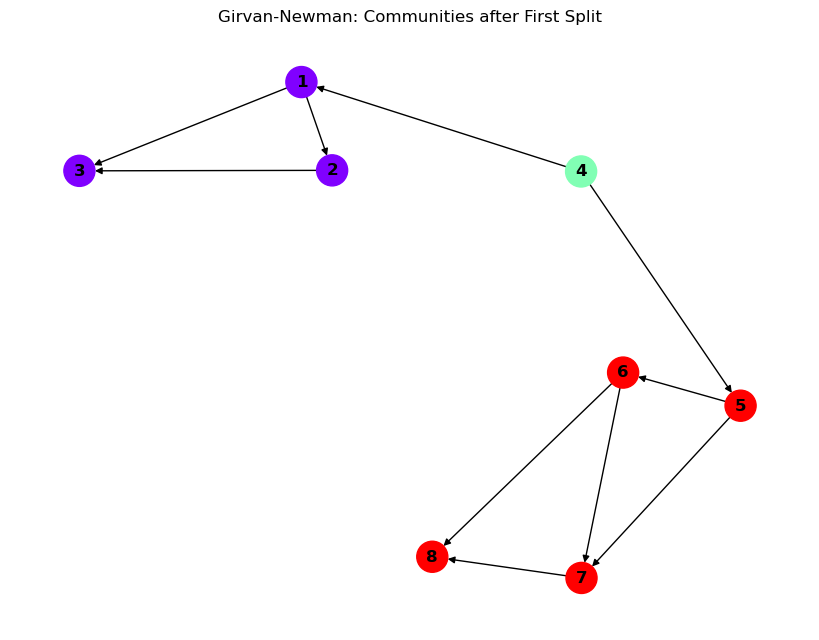

In [109]:
# Grivan Newmann : 
comp = girvan_newman(G)
it = 0
for communities in itertools.islice(comp, 4):
    it +=1
    print('Iteration', it)
    print(tuple(sorted(c) for c in communities)) 
# separate community with the same betweeness


# visualisation : 
communities = girvan_newman(G)
first_level_communities = next(communities) # gives the first partition (two communities).
second = next(communities) #re do split then update the grah --> one mor color 
community_map = {node: i for i, community in enumerate(second) for node in community}
# Assign colors to communities
colors = [community_map[node] for node in G.nodes()]
# Visualize the graph with community coloring
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=500, font_weight="bold")
plt.title("Girvan-Newman: Communities after First Split")
plt.show()
#The graph will show nodes divided into communities, with distinct colors for each community.

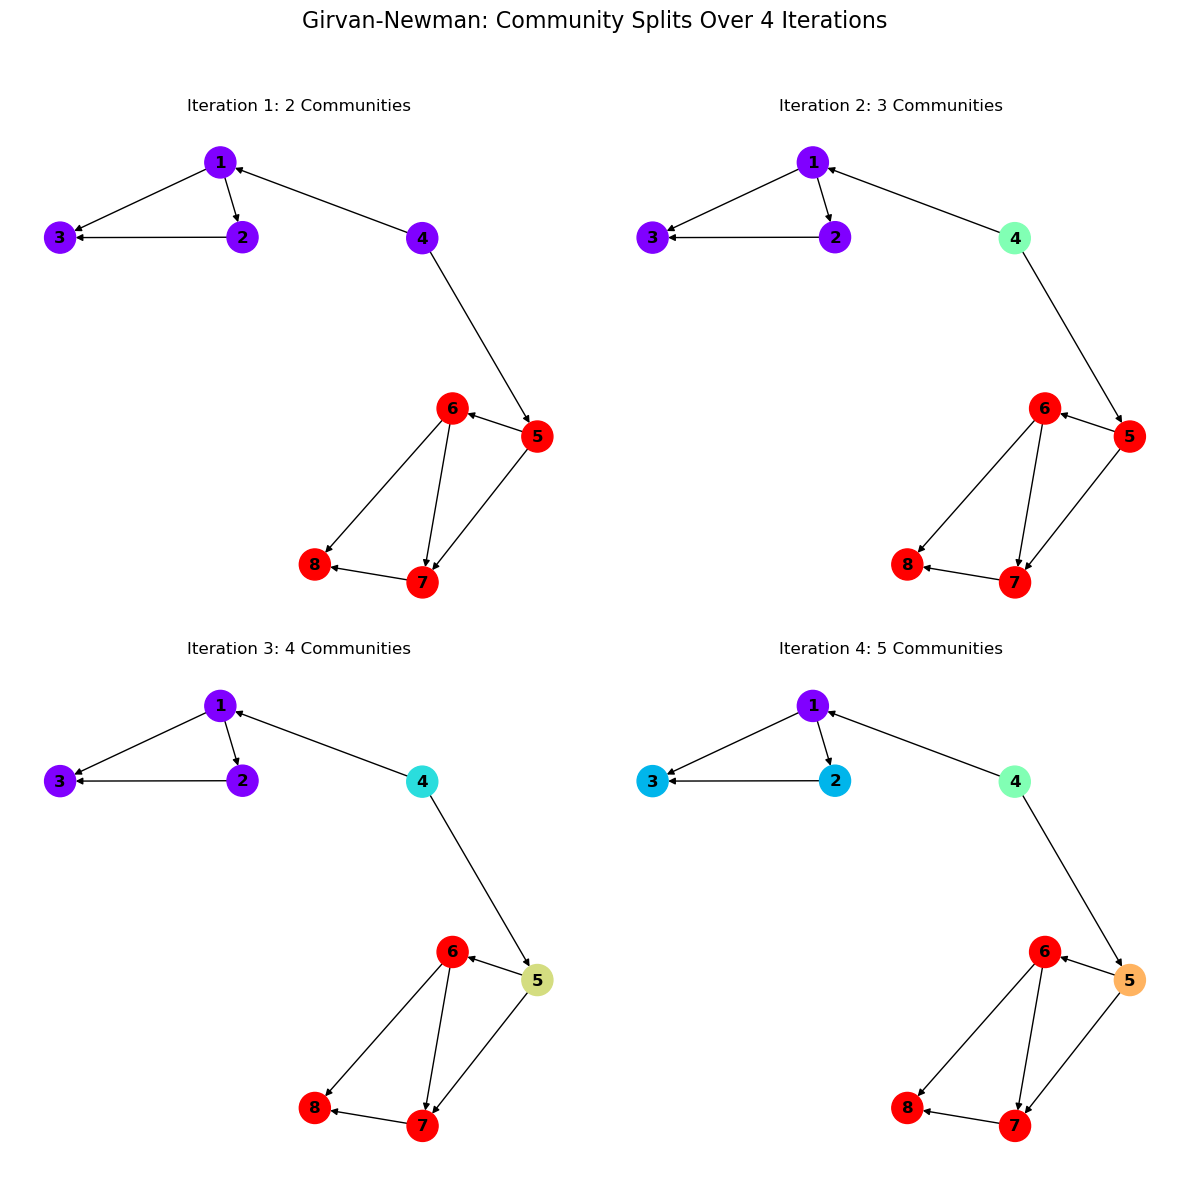

In [108]:
communities = girvan_newman(G)

# Set up a plot for 4 iterations
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate through 4 community splits
for i in range(4):
    # Get the next partition
    current_communities = next(communities)
    
    # Map nodes to community IDs
    community_map = {node: idx for idx, community in enumerate(current_communities) for node in community}
    colors = [community_map[node] for node in G.nodes()]
    
    # Draw the graph with community coloring
    ax = axes[i]
    pos = nx.spring_layout(G, seed=42)  # Use the same layout for consistency
    nx.draw(
        G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow,
        node_size=500, font_weight="bold", ax=ax
    )
    ax.set_title(f"Iteration {i + 1}: {len(current_communities)} Communities")

# Add a main title and show the plot
plt.suptitle("Girvan-Newman: Community Splits Over 4 Iterations", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#The graph will show nodes divided into communities, with distinct colors for each community.

In [ ]:
# Louvain : 
partition = community_louvain.best_partition(quakerG)
# add it as an attribute to the nodes
for n in quakerG.nodes:
    quakerG.nodes[n]["louvain"] = partition[n]
# plot it out
pos = nx.spring_layout(quakerG,k=0.2) # k : float (default=None)Optimal distance between nodes. If None the distance is set to 1/sqrt(n) where n is the number of nodes. Increase this value to move nodes farther apart.

ec = nx.draw_networkx_edges(quakerG, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(quakerG, pos, nodelist=quakerG.nodes(), node_color=[quakerG.nodes[n]["louvain"] for n in quakerG.nodes], 
                            node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

In [ ]:
# look at one cluster 
cluster_James = partition['James Nayler']
# Take all the nodes that belong to James' cluster
members_c = [q for q in quakerG.nodes if partition[q] == cluster_James]
# get info about these quakers
for quaker in members_c:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'and died in ',quakerG.nodes[quaker]['Deathdate'])
# return not only the direct connection of the node 

#visualuazation od a sub-graph : 
subgraph_James = quakerG.subgraph(['James Nayler']+list(quakerG.neighbors('James Nayler')))
nx.draw_circular(subgraph_James, with_labels=True)

#### Homophily 
How likely is it that two node who have the same attribute are linked?
Try to measure the similarity of connections in the graph with respect to a given attribute.   
*Intuition: Like correlation, but translated to graphs.*

In [ ]:
# categorical features : 
nx.attribute_assortativity_coefficient(quakerG, 'Gender')
# reurn a number < 1 / number closer to 1 more feture homophily in the network 
# check for imbalance --> ex :  gender more men then women 
nodes.groupby('Gender').size()

# continuous / numerical features : 
# for numerical attributes, values must be integers
nx.attribute_assortativity_coefficient(quakerG, 'Role')

# 0,58 --> homophily , ex : peoplke how died at the same time have more channce to known each other 

#### Network metrics 
* **Average Degree** 
len(G.edges())/len(G.nodes()) # average degree <br>
NO median power law <br>
Average degree is not recommended as the degree distribution of real-world networks usually follows a powerlaw. Summarizing powerlaws with average values is not a good idea, as there is a long tail, and there are many nodes that have very high degree. Instead, median is a better choice.<br>
*  **Closeness centrality**  : A node with high closeness centrality can quickly interact with all other nodes in the network.
    It identifies nodes that are in a "central" position based on proximity to others.
    - application : -  Social networks: Finding influential individuals.
                    -  Transportation networks: Identifying well-connected hubs.
    - C = 1/farness 
    - Connected graph 
    - node that are easy to reached --> important 

* **Page Rank** : Nodes with high PageRank have many incoming links (in links) from important nodes.
The algorithm propagates importance through the network. 
Works with all type of network even disconnected 
    -  Applications:- Web search engines: Ranking websites.
                    - Citation networks: Ranking influential research papers.
    - x = Mx ; x steady state the markov chain ; x_i fraction of time a random walker will have spent in node i 

* **Betweeness centrality** : 
    - the more shortest paths passes through i 
    - High betweenness centrality indicates that a node plays a key role in connecting different parts of the network.
    - It identifies nodes critical for information flow or structural integrity.
    - expensive 
    - Applications: - Social networks: Identifying gatekeepers.
                    - Communication networks: Detecting points of failure.

* **Katz centrality** : 
    - accounting for the quality and length of connections.
    - A node connected to influential neighbors will have higher centrality.
    - more robust than degree centrality 
    - also counts neighbors at dist 2/3 
    - Applications: - Recommendation systems: Identifying key nodes in collaborative networks.
                    - Social networks: Ranking influential users.
### Comparison

| Metric                | Considers Directed Links? | Considers Indirected Links?      | Key Use Case                                   |
|-----------------------|-------------------------|------------------------------------|-----------------------------------------------|
| Closeness Centrality  | Yes                    | Yes                                | Measuring how close a node is to all others.  |
| PageRank              | Yes                    | Yes (weighted by importance)       | Ranking importance in directed networks.      |
| Betweenness Centrality| No                     | Yes (via shortest paths)           | Identifying bridges or intermediaries.        |
| Katz Centrality       | Yes                    | Yes (weighted by attenuation)      | Ranking influence with propagation effects.   |


In [116]:
import networkx as nx
import pandas as pd

# Create a sample graph (replace this with your graph)
G = nx.karate_club_graph()

# 1. Closeness Centrality
closeness = nx.closeness_centrality(G)
avg_closeness = sum(closeness.values()) / len(closeness)
print("Closeness Centrality (Average):", avg_closeness)
max_closeness_node = max(closeness, key=closeness.get)
max_closeness_value = closeness[max_closeness_node]

# 2. PageRank
pagerank = nx.pagerank(G, alpha=0.85) # alpha damping factor
avg_pagerank = sum(pagerank.values()) / len(pagerank)
print("PageRank (Average):", avg_pagerank)
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank_value = pagerank[max_pagerank_node]

# 3. Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
avg_betweenness = sum(betweenness.values()) / len(betweenness)
print("Betweenness Centrality (Average):", avg_betweenness)
max_betweenness_node = max(betweenness, key=betweenness.get)
max_betweenness_value = betweenness[max_betweenness_node]

# 4. Katz Centrality
katz = nx.katz_centrality(G, alpha=0.1, beta=1.0)  # Adjust alpha/beta as needed
avg_katz = sum(katz.values()) / len(katz)
print("Katz Centrality (Average):", avg_katz)
max_katz_node = max(katz, key=katz.get)
max_katz_value = katz[max_katz_node]

# eigenvector centrality 
eigenvector_centrality = nx.eigenvector_centrality(G)


# Display the results for each node --> markdown 
print("\nNode-wise Metrics:")
print("Node | Closeness | PageRank | Betweenness | Katz")
for node in G.nodes():
    print(f"{node:>4} | {closeness[node]:.4f} | {pagerank[node]:.4f} | {betweenness[node]:.4f} | {katz[node]:.4f}")

# Create a dictionary to hold the node metrics
node_metrics = {
    "Node": list(G.nodes()),
    "Closeness": [closeness[node] for node in G.nodes()],
    "PageRank": [pagerank[node] for node in G.nodes()],
    "Betweenness": [betweenness[node] for node in G.nodes()],
    "Katz": [katz[node] for node in G.nodes()],
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(node_metrics)

# Display the DataFrame
print("\nNode-wise Metrics DataFrame:")
print(metrics_df)

# Print the maximum values and corresponding nodes
print("Maximum Values and Corresponding Nodes:")
print(f"Closeness Centrality: Node {max_closeness_node}, Value {max_closeness_value:.4f}")
print(f"PageRank: Node {max_pagerank_node}, Value {max_pagerank_value:.4f}")
print(f"Betweenness Centrality: Node {max_betweenness_node}, Value {max_betweenness_value:.4f}")
print(f"Katz Centrality: Node {max_katz_node}, Value {max_katz_value:.4f}")



Closeness Centrality (Average): 0.4264796325735234
PageRank (Average): 0.02941176470588236
Betweenness Centrality (Average): 0.044006238859180036
Katz Centrality (Average): 0.16045917940415524

Node-wise Metrics:
Node | Closeness | PageRank | Betweenness | Katz
   0 | 0.5690 | 0.0885 | 0.4376 | 0.3213
   1 | 0.4853 | 0.0574 | 0.0539 | 0.2355
   2 | 0.5593 | 0.0628 | 0.1437 | 0.2658
   3 | 0.4648 | 0.0372 | 0.0119 | 0.1949
   4 | 0.3793 | 0.0205 | 0.0006 | 0.1219
   5 | 0.3837 | 0.0338 | 0.0300 | 0.1310
   6 | 0.3837 | 0.0315 | 0.0300 | 0.1310
   7 | 0.4400 | 0.0265 | 0.0000 | 0.1662
   8 | 0.5156 | 0.0334 | 0.0559 | 0.2007
   9 | 0.4342 | 0.0095 | 0.0008 | 0.1242
  10 | 0.3793 | 0.0207 | 0.0006 | 0.1219
  11 | 0.3667 | 0.0098 | 0.0000 | 0.0966
  12 | 0.3708 | 0.0115 | 0.0000 | 0.1161
  13 | 0.5156 | 0.0335 | 0.0459 | 0.1994
  14 | 0.3708 | 0.0129 | 0.0000 | 0.1251
  15 | 0.3708 | 0.0164 | 0.0000 | 0.1251
  16 | 0.2845 | 0.0168 | 0.0000 | 0.0907
  17 | 0.3750 | 0.0097 | 0.0000 | 0.1202


## get info and supgraphs 

In [ ]:
#creat multiple supgraphs 
edge_episode = nx.get_edge_attributes(G, "episode")
episode_list = sorted(list(set(df.episode.values)))
subgraph_pr_tot = pd.DataFrame()
for episode in episode_list: 
    # Find edges for the current episode
    edges_per_episode = [i for i, v in edge_episode.items() if v == episode]
    # Create the subgraph
    subgraph_pr = G.edge_subgraph(edges_per_episode)
    out_degrees = dict(subgraph_pr.out_degree())  # Out-degree
    pagerank = nx.pagerank(subgraph_pr, alpha=0.85)  # PageRank
    
    # Collect metrics for each node
    node_metrics_per_episode = {
        "Node": list(subgraph_pr.nodes()),
        "centrality": [out_degrees[node] for node in subgraph_pr.nodes()],
        "PageRank": [pagerank[node] for node in subgraph_pr.nodes()],
        "episode": episode,
    }
    node_metrics_per_episode = pd.DataFrame(node_metrics_per_episode)

    # Append to the overall DataFrame
    subgraph_pr_tot = pd.concat([subgraph_pr_tot, node_metrics_per_episode], ignore_index=True)


subgraph_pr_tot # data frame with each node centrality and Page rank per episode 

## Matching using network 

A matching in a graph is a subset of edges where no two edges share a common vertex.
A maximal matching is a matching that cannot be extended by adding more edges without violating the matching property.
In other words, it is a local maximum where no more edges can be added while keeping it a matching.

In [ ]:
#A set of edges representing the maximal matching.
matching = nx.maximal_matching(G_obs)
print(f'#Matched pairs: {len(matching)}')


In [ ]:
# mathcing test 
ntreated = paths.loc[np.array([v[0] if ~paths.loc[v[0], "in_degree_binary_target"] else v[1] for v in matching])]
treated = paths.loc[np.array([v[0] if paths.loc[v[0], "in_degree_binary_target"] else v[1] for v in matching])]
ate = treated.finished.values.astype(int) - ntreated.finished.values.astype(int)
print(np.mean(ate),  stats.sem(ate))



## TRUC

Louvain : The Louvain Method is a popular algorithm used for community detection in networks. It identifies groups of nodes (called communities) that are more densely connected to each other than to the rest of the network. This method is widely used due to its speed and ability to handle large networks.

# Handling text 

## initialization

In [118]:
# package : 
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
#import pyLDAvis.gensim
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

#The data
corpus_root = 'books/'

In [120]:
# initialising spacy analyser in english 
nlp = spacy.load('en_core_web_sm')

#German: python -m spacy download de_core_news_sm --> nlp = spacy.load('de_core_news_sm')  # Example for German

#French: python -m spacy download fr_core_news_sm
#Spanish: python -m spacy download es_core_news_sm
#Chinese: python -m spacy download zh_core_web_sm
# Multi-language: python -m spacy download xx_ent_wiki_sm

In [ ]:
# load data 
books = list()

for book_file in os.listdir(corpus_root):
    if ".txt" in book_file:
        print(book_file)
        with codecs.open(os.path.join(corpus_root,book_file),encoding="utf8") as f:
            books.append(f.read())
print(books[3][0:600]) # books[line in the list][start caracter to : end caracter]
books = [" ".join(b.split()) for b in books] # take out new line command 
#index all books
book = books[1]

#put in raw text, get a Spacy object
doc = nlp(book) # take time !  

## Create NLP pipline with spacy 

### Step 1 : sentence splitting : words --> sentences 

In [ ]:
sentences = [sent for sent in doc.sents] # of book 1 --> frankenstein
print('Sentence 1:',sentences[0],'\n')
print('Sentence 2:',sentences[1],'\n')
print('Sentence 3:',sentences[2],'\n')

### Step 2 : tokenization : character--> words 

In [121]:
example = 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.'

doc = nlp(example)
# si trop d'espace --> token '    ' 
#strings are encoded to hashes
tokens = [token.text for token in doc]
print(example,'\n')
print(tokens)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

['I', 'am', 'already', 'far', 'north', 'of', 'London', ',', 'and', 'as', 'I', 'walk', 'in', 'the', 'streets', 'of', 'Petersburgh', ',', 'I', 'feel', 'a', 'cold', 'northern', 'breeze', 'play', 'upon', 'my', 'cheeks', ',', 'which', 'braces', 'my', 'nerves', 'and', 'fills', 'me', 'with', 'delight', '.']


### Step 3 : Part of speech tagging : POS
The model makes a prediction of which tag or label most likely applies in this context. For example, a word following "the" in English is most likely a noun.

In [122]:
pos_tagged = [(token.text, token.pos_) for token in doc] # return ('token', type of world)

print(example,'\n')
print(pos_tagged)
# if i don't know what type of world or http://universaldependencies.org/u/pos/all.html
print(spacy.explain('CCONJ'))

# more detailed version 
pos_tagged = [(token.text, token.tag_) for token in doc]

print(pos_tagged)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 'PRON'), ('am', 'AUX'), ('already', 'ADV'), ('far', 'ADV'), ('north', 'ADV'), ('of', 'ADP'), ('London', 'PROPN'), (',', 'PUNCT'), ('and', 'CCONJ'), ('as', 'SCONJ'), ('I', 'PRON'), ('walk', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('streets', 'NOUN'), ('of', 'ADP'), ('Petersburgh', 'PROPN'), (',', 'PUNCT'), ('I', 'PRON'), ('feel', 'VERB'), ('a', 'DET'), ('cold', 'ADJ'), ('northern', 'ADJ'), ('breeze', 'NOUN'), ('play', 'VERB'), ('upon', 'SCONJ'), ('my', 'PRON'), ('cheeks', 'NOUN'), (',', 'PUNCT'), ('which', 'PRON'), ('braces', 'VERB'), ('my', 'PRON'), ('nerves', 'NOUN'), ('and', 'CCONJ'), ('fills', 'VERB'), ('me', 'PRON'), ('with', 'ADP'), ('delight', 'NOUN'), ('.', 'PUNCT')]
coordinating conjunction
[('I', 'PRP'), ('am', 'VBP'), ('already', 'RB'), ('far', 'RB'), ('north', 'RB'), ('of', 'IN'), ('London

### Step 4: Named entity recognition : NER 

For example, a person, a country, a product or a book title. Spacy can recognise various types of named entities in a document. This doesn't always work perfectly and might need some tuning later, depending on your use case.

Built in entity types: <br>

PERSON  People, including fictional.  <br>
NORP	Nationalities or religious or political groups. <br>
FAC	Buildings, airports, highways, bridges, etc. <br>
ORG	Companies, agencies, institutions, etc. <br>
GPE	Countries, cities, states. <br>
LOC	Non-GPE locations, mountain ranges, bodies of water. <br>
PRODUCT	Objects, vehicles, foods, etc. (Not services.) <br>
EVENT	Named hurricanes, battles, wars, sports events, etc. <br>
WORK_OF_ART	Titles of books, songs, etc. <br>
LAW	Named documents made into laws. <br>
LANGUAGE	Any named language. <br>
DATE	Absolute or relative dates or periods. <br>
TIME	Times smaller than a day. <br>
PERCENT	Percentage, including "%". <br>
MONEY	Monetary values, including unit. <br>
QUANTITY	Measurements, as of weight or distance. <br>
ORDINAL	"first", "second", etc. <br>
CARDINAL	Numerals that do not fall under another type. <br>

In [123]:
print(example,'\n')
for ent in doc.ents:
    print(ent.text, ent.label_) # entity types build in 
#How to create more ? 

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

London GPE
Petersburgh GPE


### Step 5 : Stop Words
  Common words in a language that are often filtered out during natural language processing (NLP) because they are considered to be of little value in terms of content or meaning. These words usually include articles, prepositions, conjunctions, and pronouns that are necessary for grammatical structure but do not carry significant meaning on their own in the context of text analysis.

In [128]:
# info in the build in 
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords)) 
print('First ten stop words:',list(spacy_stopwords)[:10])

#apply it 
print(example,'\n')
stop_words = [token.text for token in doc if token.is_stop]
print(stop_words)


#modifie stop_words 
from nltk.corpus import stopwords
# Get the default English stopwords list from NLTK
default_stopwords = stopwords.words('english')
# Define custom stopwords by adding/removing words
custom_stopwords = set(default_stopwords)  # Start with the default list
# Add custom stopwords (e.g., domain-specific words)
custom_stopwords.update(["exampleword1", "exampleword2", "product", "brand"])
# Remove words that you want to keep (e.g., "not" in sentiment analysis)
custom_stopwords.discard("not")
print(custom_stopwords)


Number of stop words: 326
First ten stop words: ['seeming', 'such', "n't", 'latter', 'twenty', 'ten', 'indeed', 'so', 'until', 'among']
{'for', 'such', "hasn't", 'haven', 'over', 'through', 'shan', 'during', 'them', 'again', 'into', 'then', 'so', 'these', 'until', 'him', 'wouldn', 'too', 'hers', 'by', 'below', 'shouldn', 'ourselves', 'i', 'because', 've', 'of', 'and', "wouldn't", 'under', "didn't", 'exampleword2', 'nor', 'theirs', 'yourself', 'couldn', 'hasn', 'our', 'yourselves', 'the', 'before', "couldn't", 'those', 'off', 'aren', 'any', 'on', 'been', 'you', 'o', 'in', 'ours', 't', "aren't", "won't", 'no', 'are', 'have', 'needn', 'they', 'can', 'am', 'has', 'who', 'weren', 'some', 'was', "shan't", 'there', "shouldn't", 'each', 'my', 'why', 'where', "you're", 'up', 'should', 'more', 'own', 'a', 'isn', 'hadn', 'only', 'what', 'her', 'most', 'itself', 'between', 'doing', 'were', "weren't", "you've", 'd', 'down', 'it', "don't", 'didn', 'himself', 'your', 'product', 'y', 'yours', "doesn't

### Step 6 : Lemmantization 
 is the process of reducing a word to its base or root form, its lemma, by considering its meaning and context in a sentence. 
 Unlike stemming, which simply chops off prefixes or suffixes from words, lemmatization ensures that the resulting word is a valid word in the language. 

    - Context-based: Lemmatization uses information about the word’s part of speech (e.g., verb, noun) and its context in the sentence to determine the correct lemma.
    - Produces a valid word: The output of lemmatization is always a valid word, whereas stemming might result in non-existent words.
 

In [225]:
print(example,'\n')
for token in doc:
    if token.text != token.lemma_:
        print(token.text,'--->',token.lemma_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

am ---> be
streets ---> street
cheeks ---> cheek
braces ---> brace
nerves ---> nerve
fills ---> fill
me ---> I


### Step 7: Chunking (shallow parsing)
Noun chunks are "base noun phrases" – flat phrases that have a noun as their head -- a noun plus the words describing the noun – for example, "the lavish green grass" or "the world’s largest tech fund". 

In [ ]:
print(example,'\n')

for chunk in doc.noun_chunks:
    print(chunk.text)

### Step 8: Dependancy parsing

The terms head and child describe the words connected by an arc in the dependency tree. The type of syntactic relation that connects the child to the head can be obtain through .dep_.

Dependency parsing is a method used to analyze the grammatical structure of a sentence by identifying the relationships between words. It determines how words depend on or are connected to one another, creating a tree-like structure called a dependency tree.

In [ ]:
print(example,'\n')

for token in doc:
    print('Token:',token.text,'Head:',token.head.text, 'Children:',[child for child in token.children])

# Print tokens, heads, and children
print(f"{'Token':<10}{'Head':<10}{'Children'}") # 
print("=" * 30)
for token in doc:
    print(f"{token.text:<10}{token.head.text:<10}{[child.text for child in token.children]}")

    #:: Introduces the formatting specification for the string.
    #<: Aligns the text to the left within the specified width. Other alignment options include:
    #>: Align to the right.
    #^: Center alignment.
    #10: Specifies the minimum width for the field. If the text is shorter than 10 characters, spaces are added to the right to make it 10 characters wide. If the text is longer than 10 characters, it is not truncated.

In [ ]:
from spacy import displacy
doc=nlp(example)
# Visualize the dependency tree
displacy.render(doc, style="dep", jupyter=True)  # For Jupyter Notebook
# dans l'idée montre un tree with the connection

In [ ]:
# tree srtucture 
def print_dependency_tree(token, level=0):
    print("  " * level + f"{token.text} ({token.dep_})")
    for child in token.children:
        print_dependency_tree(child, level + 1)

# Find the root and print the tree
for token in doc:
    if token.head == token:  # Root token
        print_dependency_tree(token)

In [223]:
# tree stylé 
displacy.serve(doc, style="dep", auto_select_port=True)

NameError: name 'displacy' is not defined

### Basics metrics : 

In [228]:
#counting words occurences 
from collections import Counter
print(example,'\n')
words = [token.text for token in doc]
print(words)
# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common() # sorted by most frequences of occurences .most_common(5)--> 5 first words 

print(common_words)
print(len(common_words))
print(word_freq)
print(len(word_freq))

# take words that are important ie no ponctuation / stop words 
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words)


I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

['I', 'am', 'already', 'far', 'north', 'of', 'London', ',', 'and', 'as', 'I', 'walk', 'in', 'the', 'streets', 'of', 'Petersburgh', ',', 'I', 'feel', 'a', 'cold', 'northern', 'breeze', 'play', 'upon', 'my', 'cheeks', ',', 'which', 'braces', 'my', 'nerves', 'and', 'fills', 'me', 'with', 'delight', '.']
[('I', 3), (',', 3), ('of', 2), ('and', 2), ('my', 2), ('am', 1), ('already', 1), ('far', 1), ('north', 1), ('London', 1), ('as', 1), ('walk', 1), ('in', 1), ('the', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('a', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('upon', 1), ('cheeks', 1), ('which', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('me', 1), ('with', 1), ('delight', 1), ('.', 1)]
32
Counter({'I': 3, ',': 3, 'of': 2, 'and': 2, 'my': 2, 'am': 1, 'already': 1, 'far': 1, 'nor

AttributeError: 'Counter' object has no attribute 'hist'

In [ ]:
# putting everything together : 
nlp = spacy.load('en_core_web_sm')
nlp.remove_pipe('parser')
nlp.remove_pipe('tagger')

## Sentiment analysis : 

In [ ]:
##
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)
print(vs)

print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound']) # total score / overall sentiment of the text
# weighted sum of the valence scores (pos/neg/neutral/contextual adjustements) normalized to be between -1 and +1 
# total score : threshold of +/- 0.05 

In [130]:
# positive sentences 
positive_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc.sents]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

#negative sentences 
negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent.text)['neg']) for sent in doc.sents]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

#total 
total_sent = []
[total_sent.append(analyzer.polarity_scores(sent.text)['compound']) for sent in doc.sents]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.ylim([0,8000])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')

# global info : 
sents = [analyzer.polarity_scores(sent.text)['compound'] for sent in doc.sents]
print('Number of positive sentences:',sum(np.array(sents)>=0.05)) # The threshold value of 0.05
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of positive or neutral sentences:', sum(np.array(sents) >= 0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))



NameError: name 'analyzer' is not defined

### World cloud : 

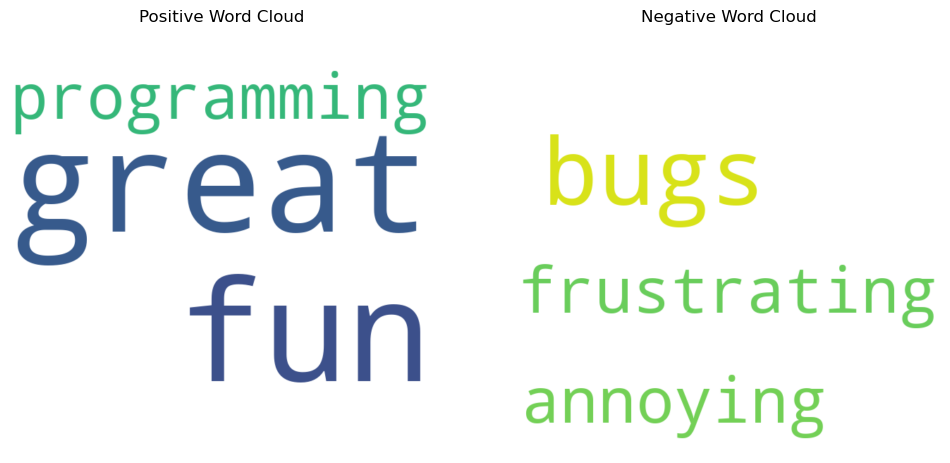

In [131]:
analyzer = SentimentIntensityAnalyzer()
# world cloud 
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = {
    'Adjectives': ['great', 'fun', 'programming', 'bugs', 'frustrating', 'annoying'],
    'sentiment_score': [0.5, 0.3, 0.2, -0.4, -0.5, -0.6]
}
data = pd.DataFrame(data)

# Filter and join the adjectives based on sentiment score
positive_text = ",".join(data[data.sentiment_score > 0.1].Adjectives.astype(str))
negative_text = ",".join(data[data.sentiment_score < -0.1].Adjectives.astype(str))

# Generate word clouds
positive_wordcloud = WordCloud(width=600, height=600, background_color='white',
                               min_font_size=10, max_words=30).generate(positive_text)
negative_wordcloud = WordCloud(width=600, height=600, background_color='white',
                               min_font_size=10, max_words=30).generate(negative_text)

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')

plt.show()


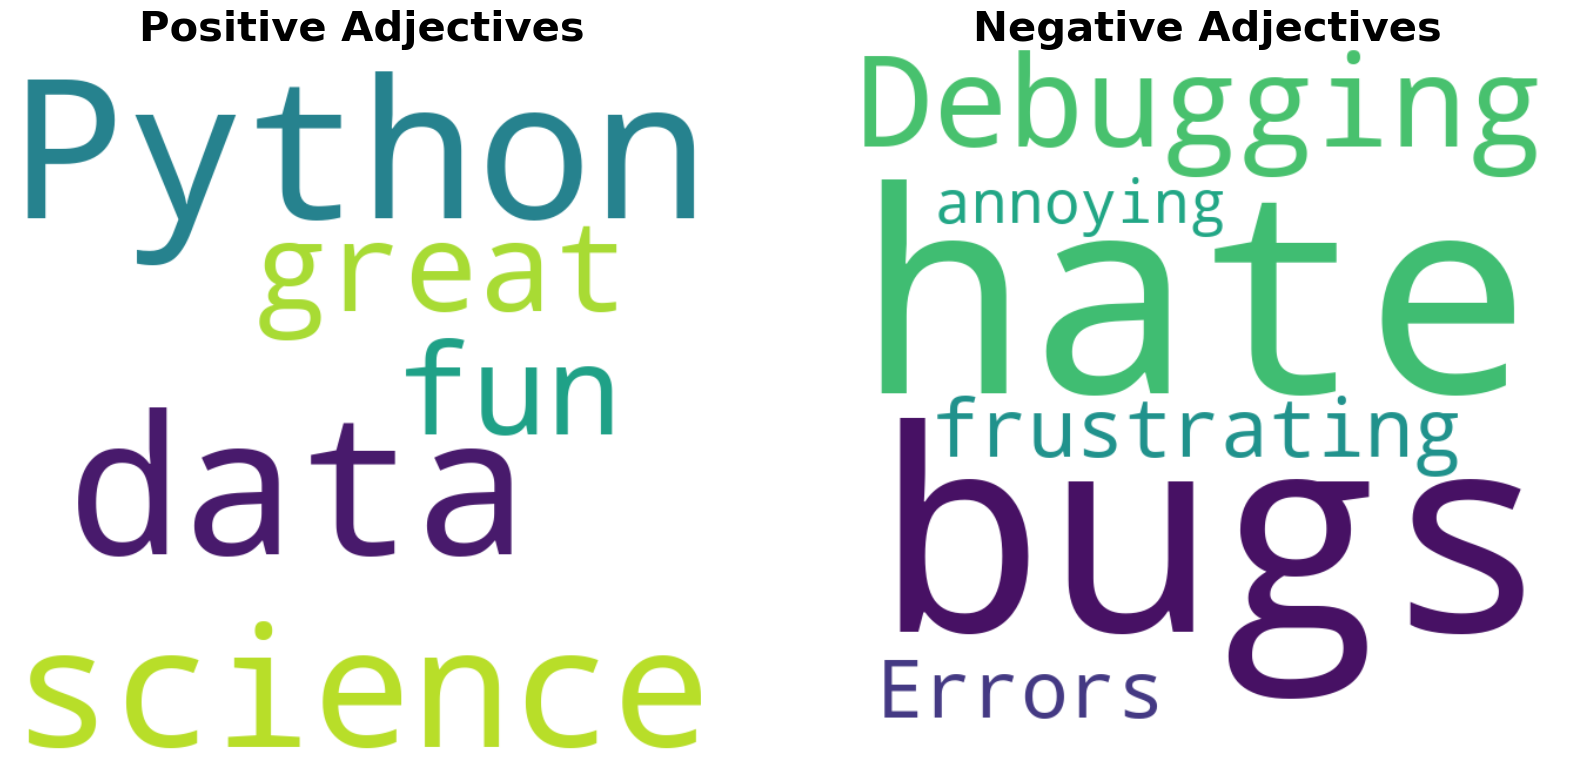

In [133]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer

# Example text
text = """
Python is great for data science. Data science is fun with Python.
I hate bugs. Debugging is frustrating. Errors are annoying.
"""

# Split the text into sentences
sentences = text.split('.')

# Classify sentences as positive or negative
positive_sent = []
negative_sent = []

for sentence in sentences:
    if sentence.strip():  # Ignore empty sentences
        sentiment_score = analyzer.polarity_scores(sentence)
        if sentiment_score['compound'] >= 0.05:
            positive_sent.append(sentence)
        elif sentiment_score['compound'] <= -0.05:
            negative_sent.append(sentence)

# Convert lists to strings
positive_text = " ".join(positive_sent)
negative_text = " ".join(negative_sent)

# Generate word clouds
positive_wordcloud = WordCloud(width=600, height=600, background_color='white',
                               min_font_size=10, max_words=30).generate(positive_text)
negative_wordcloud = WordCloud(width=600, height=600, background_color='white',
                               min_font_size=10, max_words=30).generate(negative_text)

# Plot the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Adjectives', fontsize=30, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Adjectives', fontsize=30, fontweight='bold')
axes[1].axis('off')

plt.show()

In [218]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer

text = books[3][0:600]
text = " ".join(text) if isinstance(text, list) else text


# Split the text into sentences
sentences = text.split('.')

# Classify sentences as positive or negative
positive_sent = []
negative_sent = []

for sentence in sentences:
    if sentence.strip():  # Ignore empty sentences
        sentiment_score = analyzer.polarity_scores(sentence)
        if sentiment_score['compound'] >= 0.05:
            positive_sent.append(sentence)
        elif sentiment_score['compound'] <= -0.05:
            negative_sent.append(sentence)

# Convert lists to strings
if positive_sent:
    positive_text = " ".join(positive_sent)
    positive_wordcloud = WordCloud(width=600, height=600, background_color='white',
                                   min_font_size=10, max_words=30).generate(positive_text)
else:
    positive_wordcloud = None

if negative_sent:
    negative_text = " ".join(negative_sent)
    negative_wordcloud = WordCloud(width=600, height=600, background_color='white',
                                   min_font_size=10, max_words=30).generate(negative_text)
else:
    negative_wordcloud = None

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

if positive_wordcloud:
    axes[0].imshow(positive_wordcloud, interpolation='bilinear')
    axes[0].set_title('Positive Adjectives', fontsize=30, fontweight='bold')
    axes[0].axis('off')

if negative_wordcloud:
    axes[1].imshow(negative_wordcloud, interpolation='bilinear')
    axes[1].set_title('Negative Adjectives', fontsize=30, fontweight='bold')
    axes[1].axis('off')

plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/salomelavine/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


NameError: name 'books' is not defined

## Document classification : 

In [ ]:
# Let's load our corpus via NLTK this time
from nltk.corpus import PlaintextCorpusReader
?PlaintextCorpusReader
our_books = PlaintextCorpusReader(corpus_root, '.*.txt')
print(our_books.fileids())

In [ ]:
# Book segmented in the same size of chunk 
# Get the data
book_id = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books

chunks = list()
chunk_class = list() # this list contains the original book of the chunk, for evaluation

limit = 500 # how many chunks total
size = 50 # how many sentences per chunk/page
def get_chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

for f in our_books.fileids():
    sentences = our_books.sents(f)
    print(f,":")
    print('Number of sentences:',len(sentences))
    
    # create chunks
    chunks_of_sents = [x for x in get_chunks(sentences,size)] # this is a list of lists of sentences, which are a list of tokens
    chs = list()
    
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    chunks.extend(chs[:limit])
    chunk_class.extend([book_id[f] for _ in range(len(chs[:limit]))])

    # result : not all the same number of chunk or number of sentences per chunk 

In [ ]:
vectorizer = CountVectorizer()

#initialize and specify minumum number of occurences to avoid untractable number of features
#vectorizer = CountVectorizer(min_df = 2) if we want high frequency

#create bag of words features
X = vectorizer.fit_transform(chunks)

print('Number of samples:',X.toarray().shape[0])
print('Number of features:',X.toarray().shape[1])

#mask and convert to int Frankenstein
Y = np.array(chunk_class) == 1
Y = Y.astype(int)  

#shuffle the data
X, Y = shuffle(X, Y, random_state=0)

#split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# TUPPLES ! Get its size --> transform it into an array 
X_train_array = X_train.toarray()
question_train_array = np.array(question_train)

print(len(X_train_array))


Representating the bags-of-words 

In [ ]:
vectorizer = CountVectorizer()

#initialize and specify minumum number of occurences to avoid untractable number of features
#vectorizer = CountVectorizer(min_df = 2) if we want high frequency

#create bag of words features
X = vectorizer.fit_transform(chunks)

print('Number of samples:',X.toarray().shape[0])
print('Number of features:',X.toarray().shape[1])

#mask and convert to int Frankenstein
Y = np.array(chunk_class) == 1
Y = Y.astype(int)  

#shuffle the data
X, Y = shuffle(X, Y, random_state=0)

#split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#fit a logisitic regresion + cross validation of regularization parameter on training set 
# takes time 
accs = []

#the grid of regularization parameter 
grid = [0.01,0.1,1,10,100,1000,10000]

for c in grid:
    
    #initialize the classifier
    clf = LogisticRegression(random_state=0, solver='lbfgs',C = c) # regularization term 
    
    #crossvalidate
    scores = cross_val_score(clf, X_train,Y_train, cv=10)
    accs.append(np.mean(scores))

In [ ]:
plt.plot(accs)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Regularization parameter \n (Low - strong regularization, High - weak regularization)')
plt.ylabel('Crossvalidation accuracy')
plt.ylim([0.986,1])

In [ ]:
# train with impose regulkarization term =10 
clf = LogisticRegression(random_state=0, solver='lbfgs',C = 10).fit(X_train,Y_train)

#predict on the test set
print('Accuracy:',clf.score(X_test,Y_test))

In [ ]:
# BOW are interpretable --> features that caracterize the book 
coefs=clf.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]
print(np.array(vectorizer.get_feature_names_out())[top_three])

We can perfectly predict paragraphs from Frankenstein! We saw issues of high dimensionality when using bag of words (more features than samples) and how regularization helps.

Alternative text representation: word emdeddings, pretrained on intergraded in Spacy (300-dimensional word vectors trained on Common Crawl with GloVe.) Depending on the application, might be suitable or not

In [224]:
print(example,'\n')
print('Embedding representation:',list((nlp(example).vector)[0:10]),'...')

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Embedding representation: [0.20092024, -0.07697439, -0.23990457, -0.042964943, 0.06303607, 0.093752295, 0.36673707, -0.08795004, 0.37766424, -0.11488468] ...


# TF_IDF 

In [ ]:
# create your one creat TF_IDF 

In [ ]:
# by episode 
df = df.explode(column='tokens')
X = df.groupby(['episode','tokens']).count()
X['count']=X.id
#X = X.reset_index().groupby('tokens').count().transpose()
X

In [ ]:
X = X.reset_index()[['episode','tokens','count']]

X_matrix = X.pivot(index ='tokens', columns='episode')
X_matrix

In [ ]:
X_matrix = X_matrix.fillna(0)
X_array = np.array(X_matrix)

In [ ]:
TF = X_array.T
print("shape of TF :", np.shape(TF))
IDF = np.log(np.shape(X_array)[1]/np.sum(X_array, axis=1))
print(IDF)
IDF = np.reshape(IDF, (-1,1)).T
print(np.shape(IDF))
TF_IDF = TF*IDF
print(np.shape(TF_IDF))

In [ ]:
# to merge a TF_IDF with pandas feature : 
X2 = np.hstack((X, df[["PP", "NN", "PN", "N", "P"]].values))

# NO NAN VALUES in the TF IDF matrix 
Y = wiki_nona.VOT.astype(int) # intttt 


X_train, X_test, _, _ = train_test_split(merged_df_["TXT_PROCESSED"].values, 
                                    y, test_size=0.1, random_state=42)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
clf = SGDClassifier(random_state=0, loss="loss type").fit(X_train, y_train)
y_pred = clf.predict(X_test)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(article_df.content)
print(matrix)

## Topic detection: 